In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygmt

import sys
import os
import glob
sys.path.append('./my_funcs')
%load_ext autoreload
%autoreload 2

import my_funcs.step1_funcs as step1
import my_funcs.step2_funcs as step2 
import my_funcs.step4_funcs as step4

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Step 2: Create necessary files for HASH and run HASH

In [50]:
# get a list of all the event id folders
event_paths = glob.glob("../data/eq_data/*")

# Filter only directories
event_paths = [path for path in event_paths if os.path.isdir(path)]

# Extract event IDs from the directory names
event_ids = [os.path.basename(path) for path in event_paths if os.path.isdir(path)]
# sort the event ids
event_ids.sort()
# event_ids = ['nc72086i51']
print(event_ids)

eqfile = "../data/above_slab_eq_0.2_grid.csv"

fail = 0
for event_id in event_ids:
    print(f'making HASH files {event_id}')

    folder_station = f'../data/eq_data/{event_id}'
    filename_picks = f'{folder_station}/event_{event_id}_picks.txt'
    filename_event = f'{folder_station}/eventfile_{event_id}.txt' ### make an event file first

    # make event file
    outfile = filename_event
    step2.make_eventfile(event_id, eqfile, outfile)

    if not os.path.exists(filename_picks):
        print(f'No Phase pick file {event_id}')
        fail +=1
        continue
    
    # make phase file
    outfile = f'{folder_station}/{event_id}.phase'
    step2.snuffler_to_HASH(filename_event, folder_station, filename_picks, outfile)

    # make reverse file
    outfile = f'{folder_station}/{event_id}.reverse'
    step2.create_sta_reverse(folder_station, outfile)

    # make station file
    outfile = f'{folder_station}/{event_id}.stations'
    step2.create_stations_5char(folder_station, outfile)

    # make input file
    outfile = f'{folder_station}/{event_id}.inp'
    step2.make_input_file(folder_station, event_id, outfile)

    # os.system('sh step3_run_hash.sh') # run HASH
    os.system(f'./HASH/hash_driver2_5letter<{folder_station}/{event_id}.inp')

    print(f"{'#'*10}\n focmac completed for {event_id}")
    
    # break # only run for one event
print(f"{'*'*10} successfully completed {len(event_ids)-fail} out of {len(event_ids)} events")

['nc40216664', 'nc51207076', 'nc71100926', 'nc71349716', 'nc71544046', 'nc71872550', 'nc72006040', 'nc72086051', 'nc72322146', 'nc72946846', 'nc73024816', 'nc73118836', 'nc73139111', 'nc73139526', 'nc73201181', 'nc73311641', 'nc73629686', 'nc73783911']
making HASH files nc40216664
npick 24
 Enter station list file
 Enter station polarity reversal file
 Enter name of input file (FPFIT-like format)
 Enter output file name for focal mechanisms
 Enter output file name for acceptable planes
 Enter mininum number of polarities (e.g., 8)
 Enter maximum azimuthal gap (e.g., 90)
 Enter maximum takeoff angle gap (e.g., 60)
 Enter grid angle for focal mech search, in degrees         (min    5.00000000     )
 Enter number of trials (e.g., 30)
 Enter maxout for focal mech. output (e.g., 500)
 Enter fraction of picks presumed bad (e.g., 0.10)
 Enter maximum allowed source-station distance,                    in km (e.g., 120)
 Enter angle for computing mechanisms probability,                 in degr

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


 ***station not found ME30  BHZ XQ
 Reading polarity reversal file ../data/eq_data/nc71100926/nc71100926.reverse                                                       
           1
           1
           1
 ***station not found ME33  BHZ XQ
           1
           1
 ***station not found ME35  BHZ XQ
           1
           1
           1
           1
           1
 ***station not found ME08  BHZ XQ
           1
           1  JCC     250.396469       135.644455              -1
           2  ME31    223.683167       135.595505              -1
           3  ME32    198.533844       139.614609              -1
           4  ME04    19.0460739       147.093689              -1
           5  ME29    61.1702042       147.982452              -1
           6  ME34    216.283157       148.705109              -1
           7  ME27    136.244339       150.302567               1
           8  ME37    175.248657       150.300949              -1
           9  ME36    207.133163       150.377609       

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


 ***station not found B046  EHZ PB
 ***station not found B932  EHZ PB
 ***station not found KMPB  HHZ NC
 Reading polarity reversal file ../data/eq_data/nc71544046/nc71544046.reverse                                                       
           1
 ***station not found B047  EHZ PB
           1
 ***station not found KRP   HHZ NC
           1
           1
 ***station not found KHMB  HHZ NC
           1
           1
           1  JCC     69.7567825       135.841080               1
           2  B045    109.644119       135.841980               1
           3  B049    120.151917       136.141510               1
           4  B933    135.454620       136.179520              -1
           5  KMR     119.373856       136.388428               1
           6  B935    99.8638000       136.400223               1
 cid =       nc71544046  npol =            6
 not enough npol =            6   npolmin =            8
##########
 focmac completed for nc71544046
making HASH files nc71872550
npick 17

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


 Enter file name for velocity model            5
 ***station not found K002  HNZ NC
 ***station not found KHMB  HHZ NC
 ***station not found JCC   HHZ BK
 ***station not found KHBB  HHZ NC
 ***station not found KCS   EHZ NC
 Reading polarity reversal file ../data/eq_data/nc72006040/nc72006040.reverse                                                       
           1
 ***station not found KCR   EHZ NC
 ***station not found B045  EHZ PB
 ***station not found KPP   EHZ NC
 ***station not found KMPB  HHZ NC
 ***station not found KCT   HHZ NC
 ***station not found B049  EHZ PB
 ***station not found KMR   HHZ NC
 ***station not found B047  EHZ PB
 ***station not found KCO   EHZ NC
 ***station not found KSM   EHZ NC
 ***station not found FS06B BHZ 7D
 ***station not found M14B  BHZ 7D
 ***station not found B933  EHZ PB
 ***station not found FS05B BHZ 7D
 ***station not found FS01B BHZ 7D
 ***station not found KBS   EHZ NC
 ***station not found KBN   EHZ NC
 ***station not found KIP   EHZ NC


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


 Enter file name for velocity model            4
 Enter file name for velocity model            5
 ***station not found KKP   EHZ NC
 ***station not found KPP   EHZ NC
 ***station not found KBN   EHZ NC
 ***station not found KMR   HHZ NC
 ***station not found KBS   EHZ NC
 ***station not found KIP   EHZ NC
 Reading polarity reversal file ../data/eq_data/nc72322146/nc72322146.reverse                                                       
           1
 ***station not found B049  EHZ PB
           1
 ***station not found KCS   EHZ NC
 ***station not found KHBB  HHZ NC
 ***station not found KCR   EHZ NC
 ***station not found B933  EHZ PB
 ***station not found B045  EHZ PB
 ***station not found KSM   EHZ NC
           1
           1
 ***station not found KMPB  HHZ NC
           1
 ***station not found B932  EHZ PB
 ***station not found CM01A EHZ 5E
 ***station not found KCO   EHZ NC
           1
 ***station not found B046  EHZ PB
 ***station not found CM04A EHZ 5E
 ***station not found KHMB

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


 Enter file name for velocity model            3
 Enter file name for velocity model            4
 Enter file name for velocity model            5
 ***station not found KHBB  HHZ NC
 ***station not found KPP   EHZ NC
 Reading polarity reversal file ../data/eq_data/nc73024816/nc73024816.reverse                                                       
           1
 ***station not found KHMB  HHZ NC
 ***station not found KCR   EHZ NC
 ***station not found KKP   EHZ NC
 ***station not found KMR   HHZ NC
 ***station not found B049  EHZ PB
 ***station not found B045  EHZ PB
 ***station not found JCC   HHZ BK
 ***station not found KMPB  HHZ NC
 ***station not found KBN   EHZ NC
 ***station not found KRP   HHZ NC
           1
 ***station not found B932  EHZ PB
 ***station not found KSM   EHZ NC
           1
 ***station not found B934  EHZ PB
 ***station not found KCT   HHZ NC
           1  B935    241.858887       65.3566513               1
           2  B047    242.688705       93.6730728      

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


 Enter file name for velocity model            2
 Enter file name for velocity model            3
 Enter file name for velocity model            4
 Enter file name for velocity model            5
 Reading polarity reversal file ../data/eq_data/nc73139111/nc73139111.reverse                                                       
           1
 ***station not found KCO   HNZ NC
 ***station not found B932  EHZ PB
 ***station not found KCT   HHZ NC
 ***station not found B047  EHZ PB
           1
 ***station not found KMPB  HHZ NC
           1
 ***station not found B045  EHZ PB
           1
 ***station not found B046  EHZ PB
 ***station not found 1586  HNZ NP
           1
 ***station not found 1582  HNZ NP
 ***station not found B049  EHZ PB
 ***station not found KCR   EHZ NC
           1
           1
 ***station not found JCC   HHZ BK
 ***station not found KMR   HHZ NC
 ***station not found 1580  HNZ NP
 ***station not found 79435 HNZ CE
           1
           1
           1
 ***station not 

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


 Enter station list file
 Enter station polarity reversal file
 Enter name of input file (FPFIT-like format)
 Enter output file name for focal mechanisms
 Enter output file name for acceptable planes
 Enter mininum number of polarities (e.g., 8)
 Enter maximum azimuthal gap (e.g., 90)
 Enter maximum takeoff angle gap (e.g., 60)
 Enter grid angle for focal mech search, in degrees         (min    5.00000000     )
 Enter number of trials (e.g., 30)
 Enter maxout for focal mech. output (e.g., 500)
 Enter fraction of picks presumed bad (e.g., 0.10)
 Enter maximum allowed source-station distance,                    in km (e.g., 120)
 Enter angle for computing mechanisms probability,                 in degrees (e.g., 45)
 Enter probability threshold for multiples (e.g., 0.1)
 Enter number of velocity models (max           10 )
 Enter file name for velocity model            1
 Enter file name for velocity model            2
 Enter file name for velocity model            3
 Enter file name for 

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


 Reading polarity reversal file ../data/eq_data/nc73311641/nc73311641.reverse                                                       
           1
 ***station not found BRIC  HHZ BK
           1
 ***station not found KBU   HNZ NC
 ***station not found KMR   HHZ NC
 ***station not found B933  EHZ PB
 ***station not found KPR   HNZ NC
 ***station not found 79435 HNZ CE
 ***station not found KPP   EHZ NC
 ***station not found KKP   EHZ NC
 ***station not found KSM   EHZ NC
 ***station not found KCR   EHZ NC
           1
           1
           1
           1
 ***station not found KCO   HNZ NC
 ***station not found KMPB  HHZ NC
           1
 ***station not found 89101 HNZ CE
 ***station not found PETL  HHZ BK
           1
 ***station not found KIP   HNZ NC
 ***station not found 89462 HNZ CE
 ***station not found RVIT  HHZ BK
 ***station not found 1584  HNZ NP
 ***station not found 89255 HNZ CE
 ***station not found KCT   HHZ NC
 ***station not found KBN   EHZ NC
 ***station not found DMOR  

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


# Get all the focal mechanism data into one csv file
This will include:-
- event id 
- USGS lat, lon, depth
- our best fit location
- focmech data (strike, dip, rake)

In [54]:
data_path = '../data/eq_data/'
event_ids = [os.path.basename(path) for path in glob.glob(data_path+'*') if os.path.isdir(path)]
event_ids.sort()

hash_out_df = pd.DataFrame()
for event_id in event_ids:
    outfile1= f'{data_path}/{event_id}/{event_id}.out'
    outfile2= f'{data_path}/{event_id}/{event_id}.out2'

    if not os.path.exists(outfile1):
        print(f'No output file for {event_id}')
        continue

    print(f'Processing {event_id}')
    temp_df = step4.read_output1(outfile1)

    if temp_df.shape[0] == 0:
        print(f'No output for {event_id}')
        continue
    
    hash_out_df= pd.concat([hash_out_df, temp_df], axis=0)
    print(temp_df)

hash_out_df.to_csv('../data/foc_mech/hash_out_focmech_90.csv', index=False)
hash_out_df

Processing nc40216664
        event  year  month  day  hour  minute  sec type  mag mmagtype  ...  \
0  nc40216664  2008      4   30     3       3  6.0    L  5.4        X  ...   
1  nc40216664  2008      4   30     3       3  6.0    L  5.4        X  ...   

   dip  rake  err1 err2  n_pol  weight  f_qual  prob  st_ratio  *  
0   42   -83    35   35     13       0       C    62        34  *  
1   38  -102    43   47     13       2       D    28        35  *  

[2 rows x 32 columns]
Processing nc51207076
        event  year  month  day  hour  minute   sec type  mag mmagtype  ...  \
0  nc51207076  2008      8   17     5      56  59.0    L  4.6        X  ...   

   dip  rake  err1 err2  n_pol  weight  f_qual  prob  st_ratio   *  
0   90  -147    40   49     10       3       D    28        74 NaN  

[1 rows x 32 columns]
Processing nc71100926
        event  year  month  day  hour  minute   sec type   mag mmagtype  ...  \
0  nc71100926  2008      2   24    13       0  20.0    L  3.28        X 

,event,year,month,day,hour,minute,sec,type,mag,mmagtype,...,dip,rake,err1,err2,n_pol,weight,f_qual,prob,st_ratio,*
0,nc40216664,2008,4,30,3,3,6.0,L,5.40,X,...,42,-83,35,35,13,0,C,62,34,*
1,nc40216664,2008,4,30,3,3,6.0,L,5.40,X,...,38,-102,43,47,13,2,D,28,35,*
0,nc51207076,2008,8,17,5,56,59.0,L,4.60,X,...,90,-147,40,49,10,3,D,28,74,NaN
0,nc71100926,2008,2,24,13,0,20.0,L,3.28,X,...,52,-101,46,49,10,20,D,35,84,NaN
0,nc73139111,2019,2,2,10,52,21.0,L,4.30,X,...,35,76,34,42,10,25,D,48,72,NaN
0,nc73201181,2019,6,23,3,53,2.0,L,5.58,X,...,14,-171,43,39,13,21,D,41,68,*
1,nc73201181,2019,6,23,3,53,2.0,L,5.58,X,...,75,140,44,39,13,20,D,42,71,*
0,nc73311641,2019,12,4,19,40,14.0,L,3.17,X,...,41,-99,41,45,8,14,D,35,49,NaN
0,nc73629686,2021,9,26,8,51,30.0,L,3.61,X,...,84,147,39,41,13,19,D,42,59,NaN
0,nc73783911,2022,9,20,14,3,8.0,L,3.96,X,...,11,-14,45,48,11,13,D,32,76,NaN


# Step 4: HASH plotting

../data/eq_data/nc40216664
(24, 2) (24, 3)


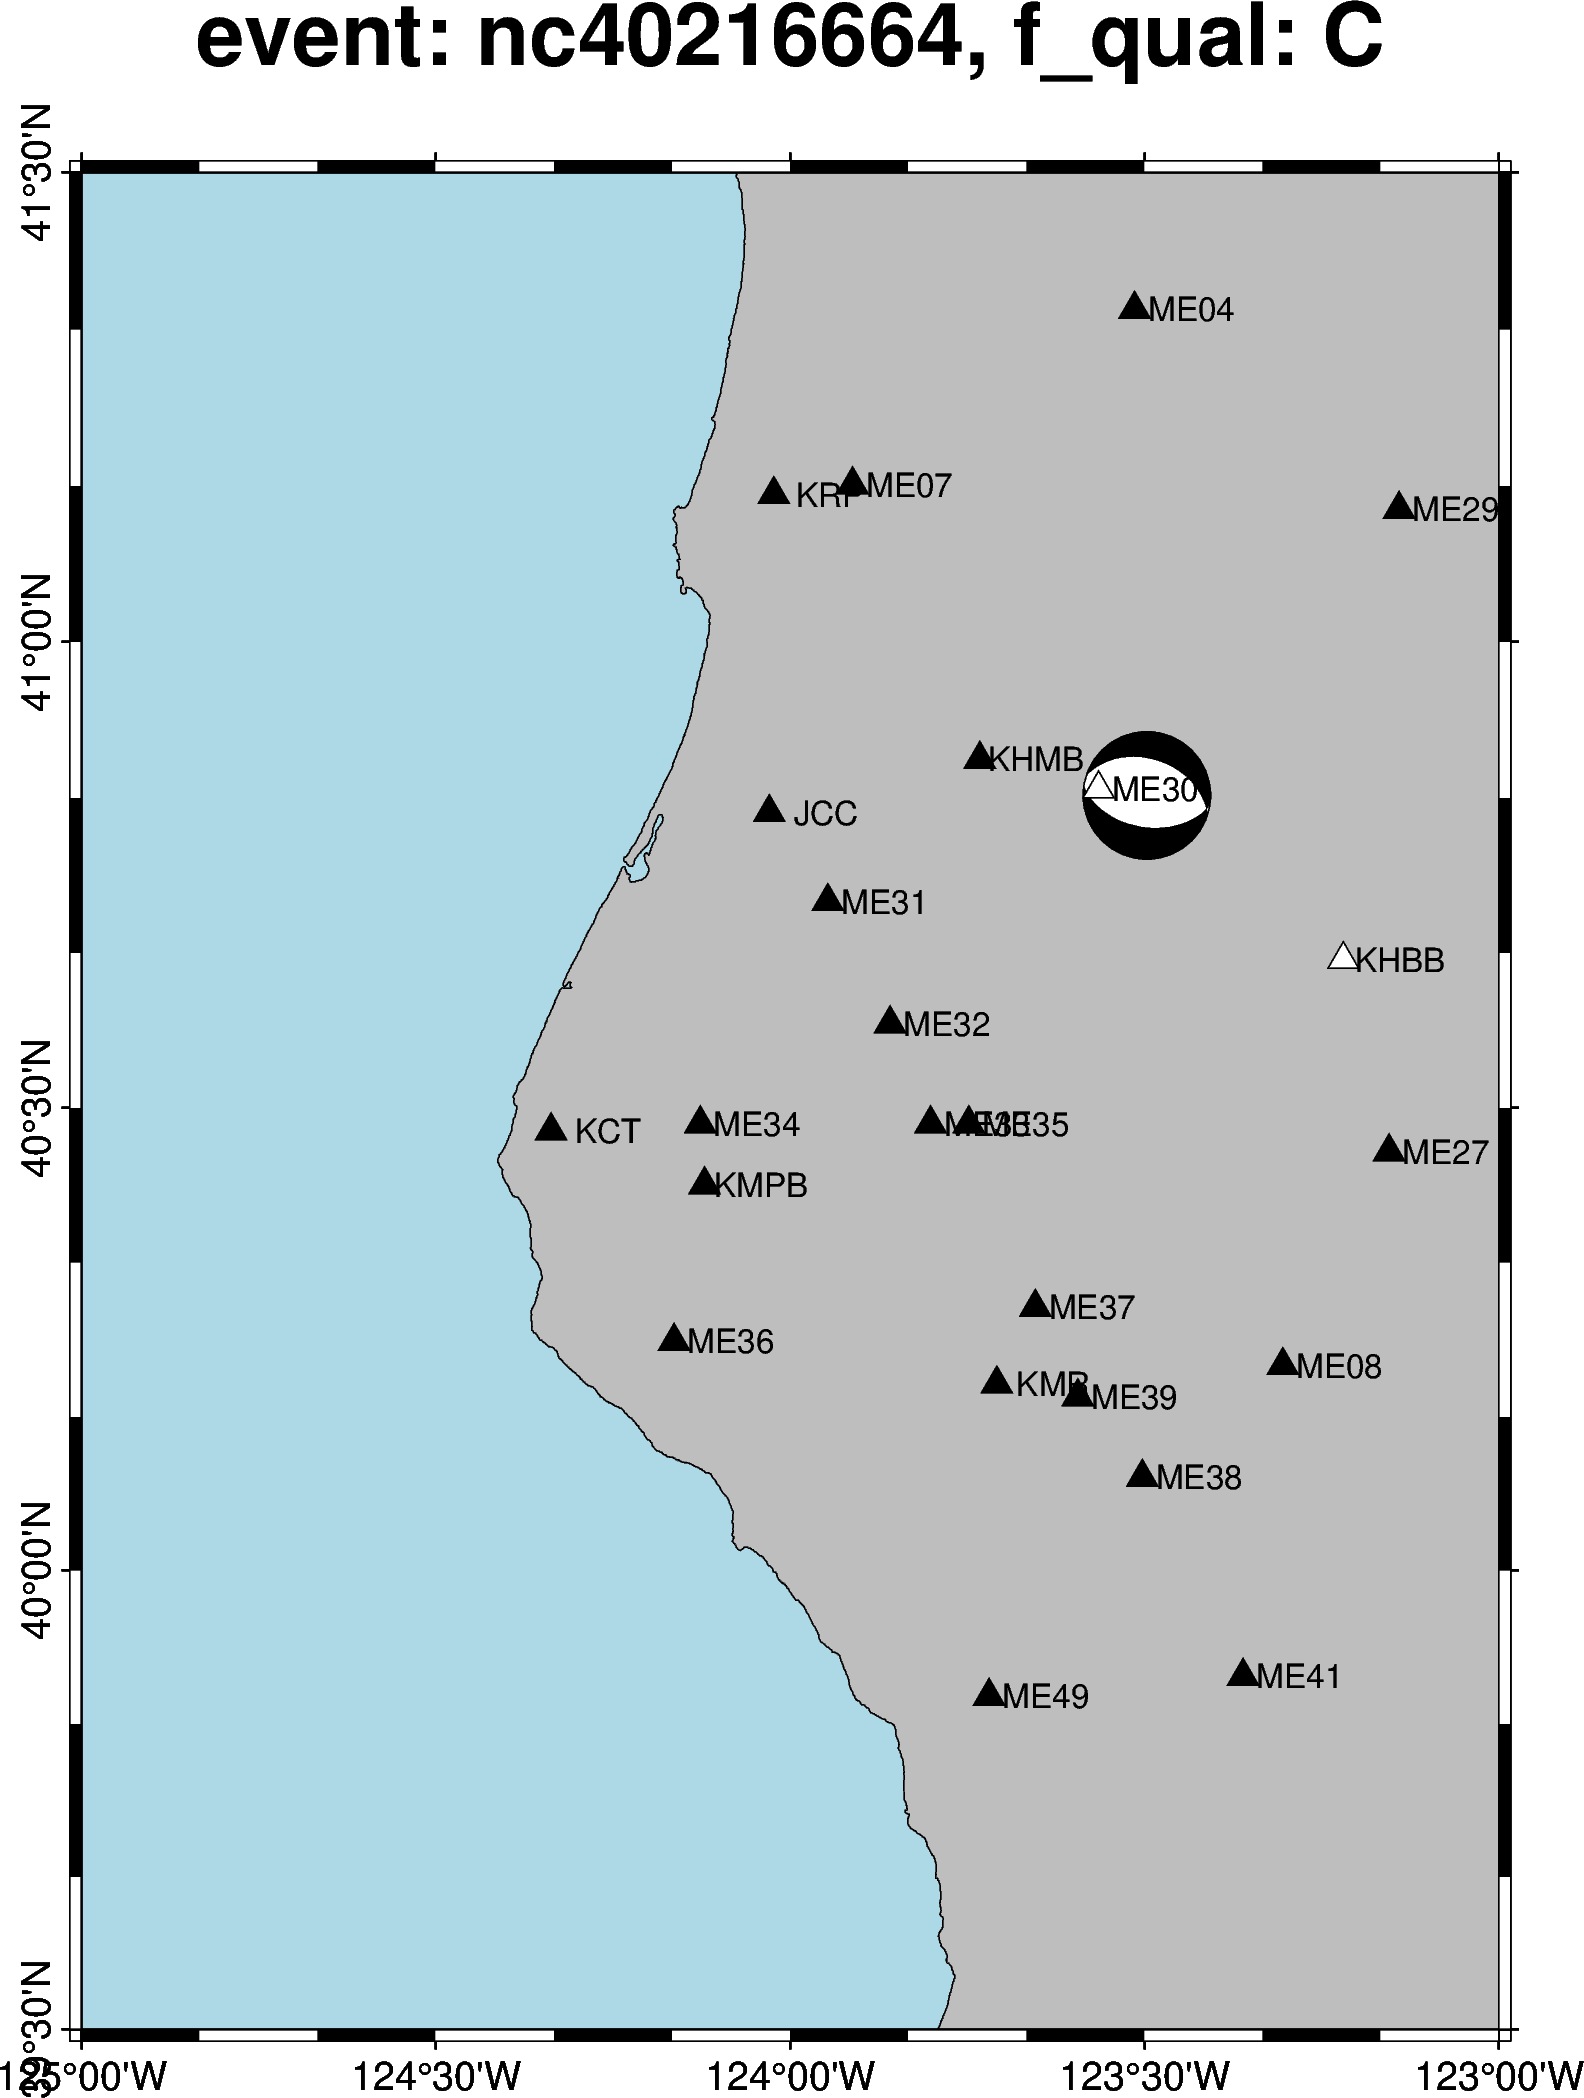

../data/eq_data/nc51207076
(22, 2) (23, 3)


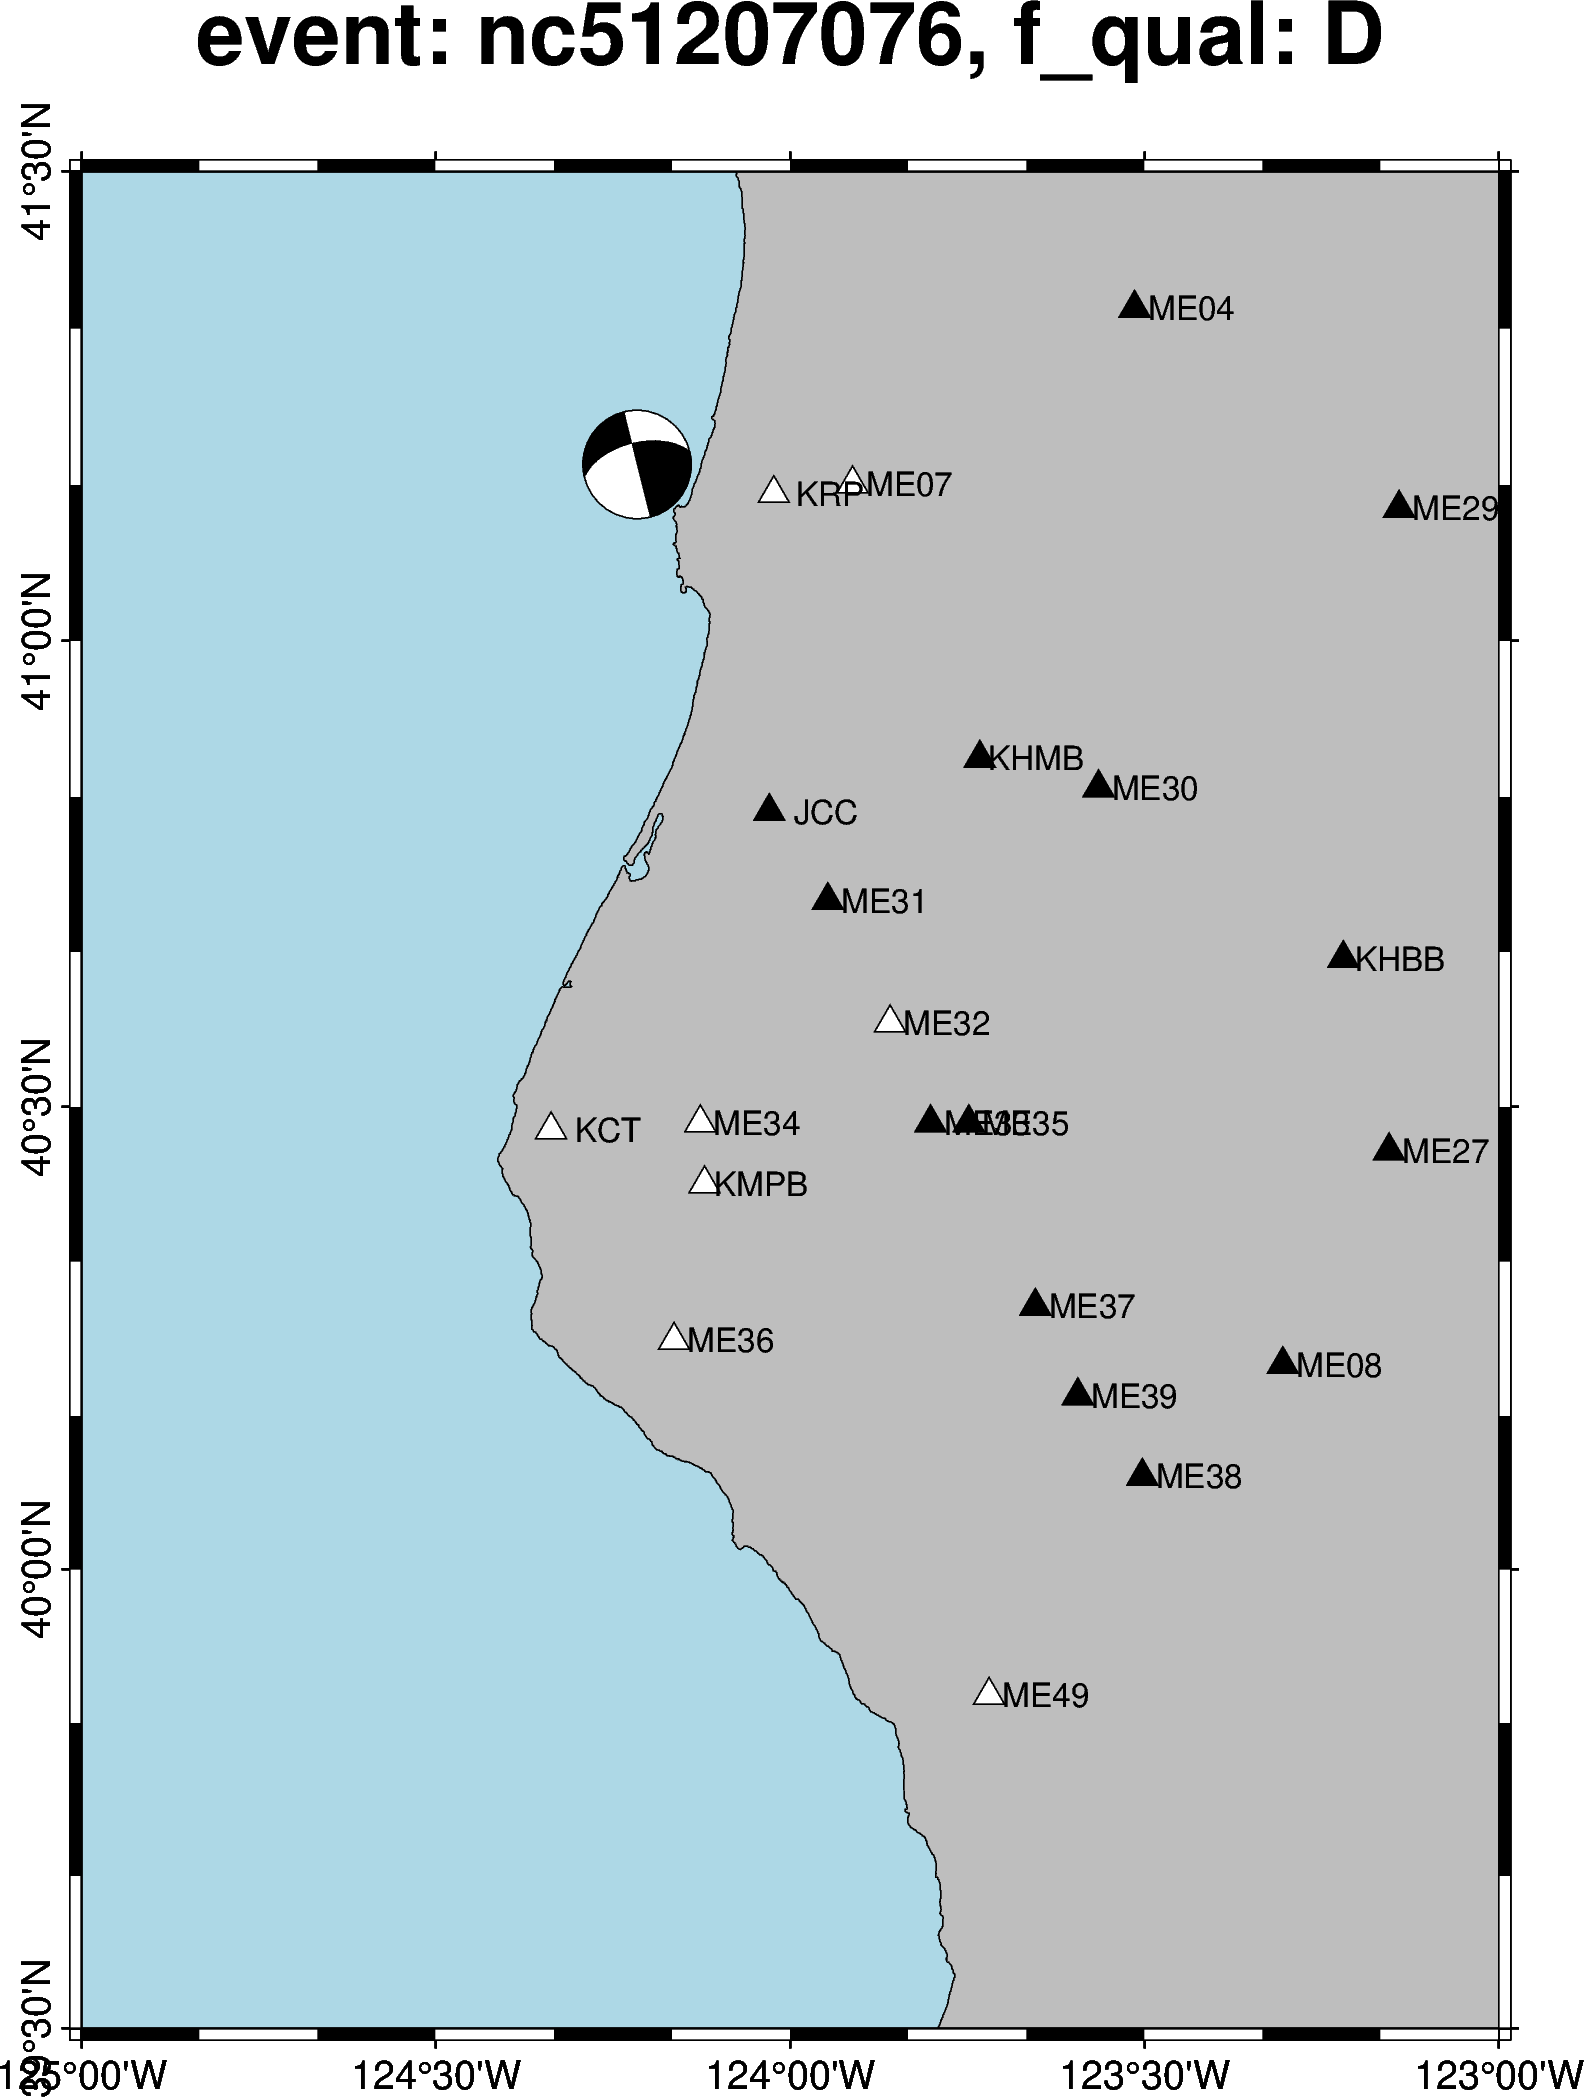

../data/eq_data/nc71100926
(15, 2) (16, 3)


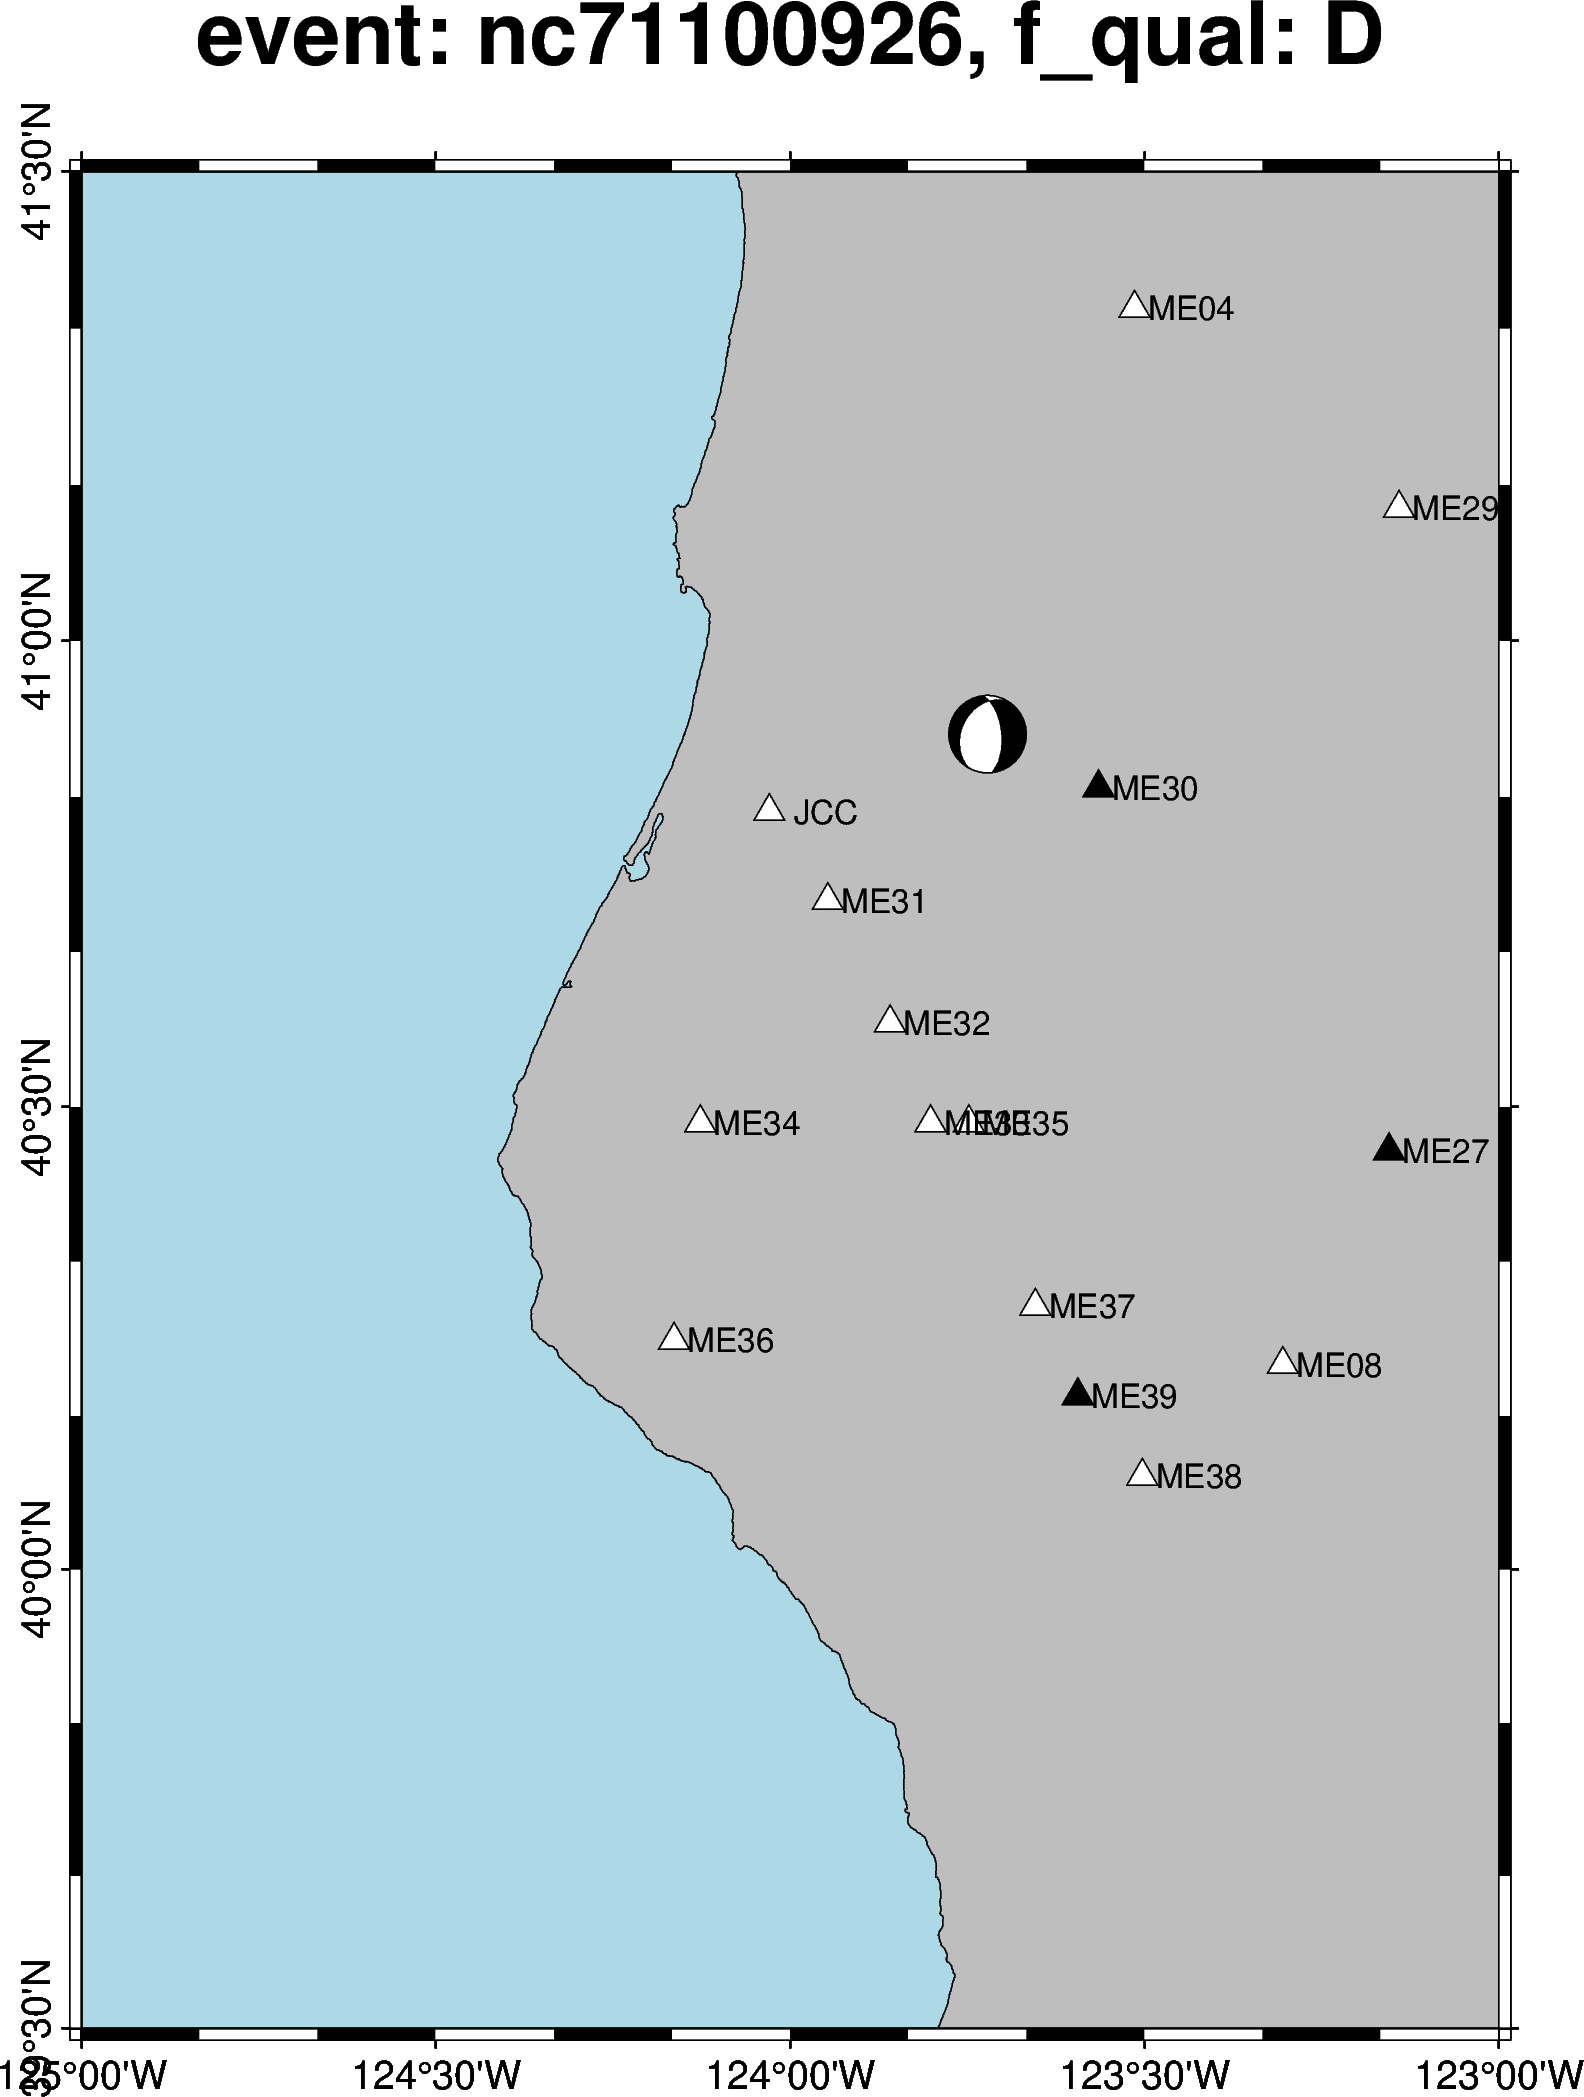

../data/eq_data/nc73139111
(30, 2) (37, 3)


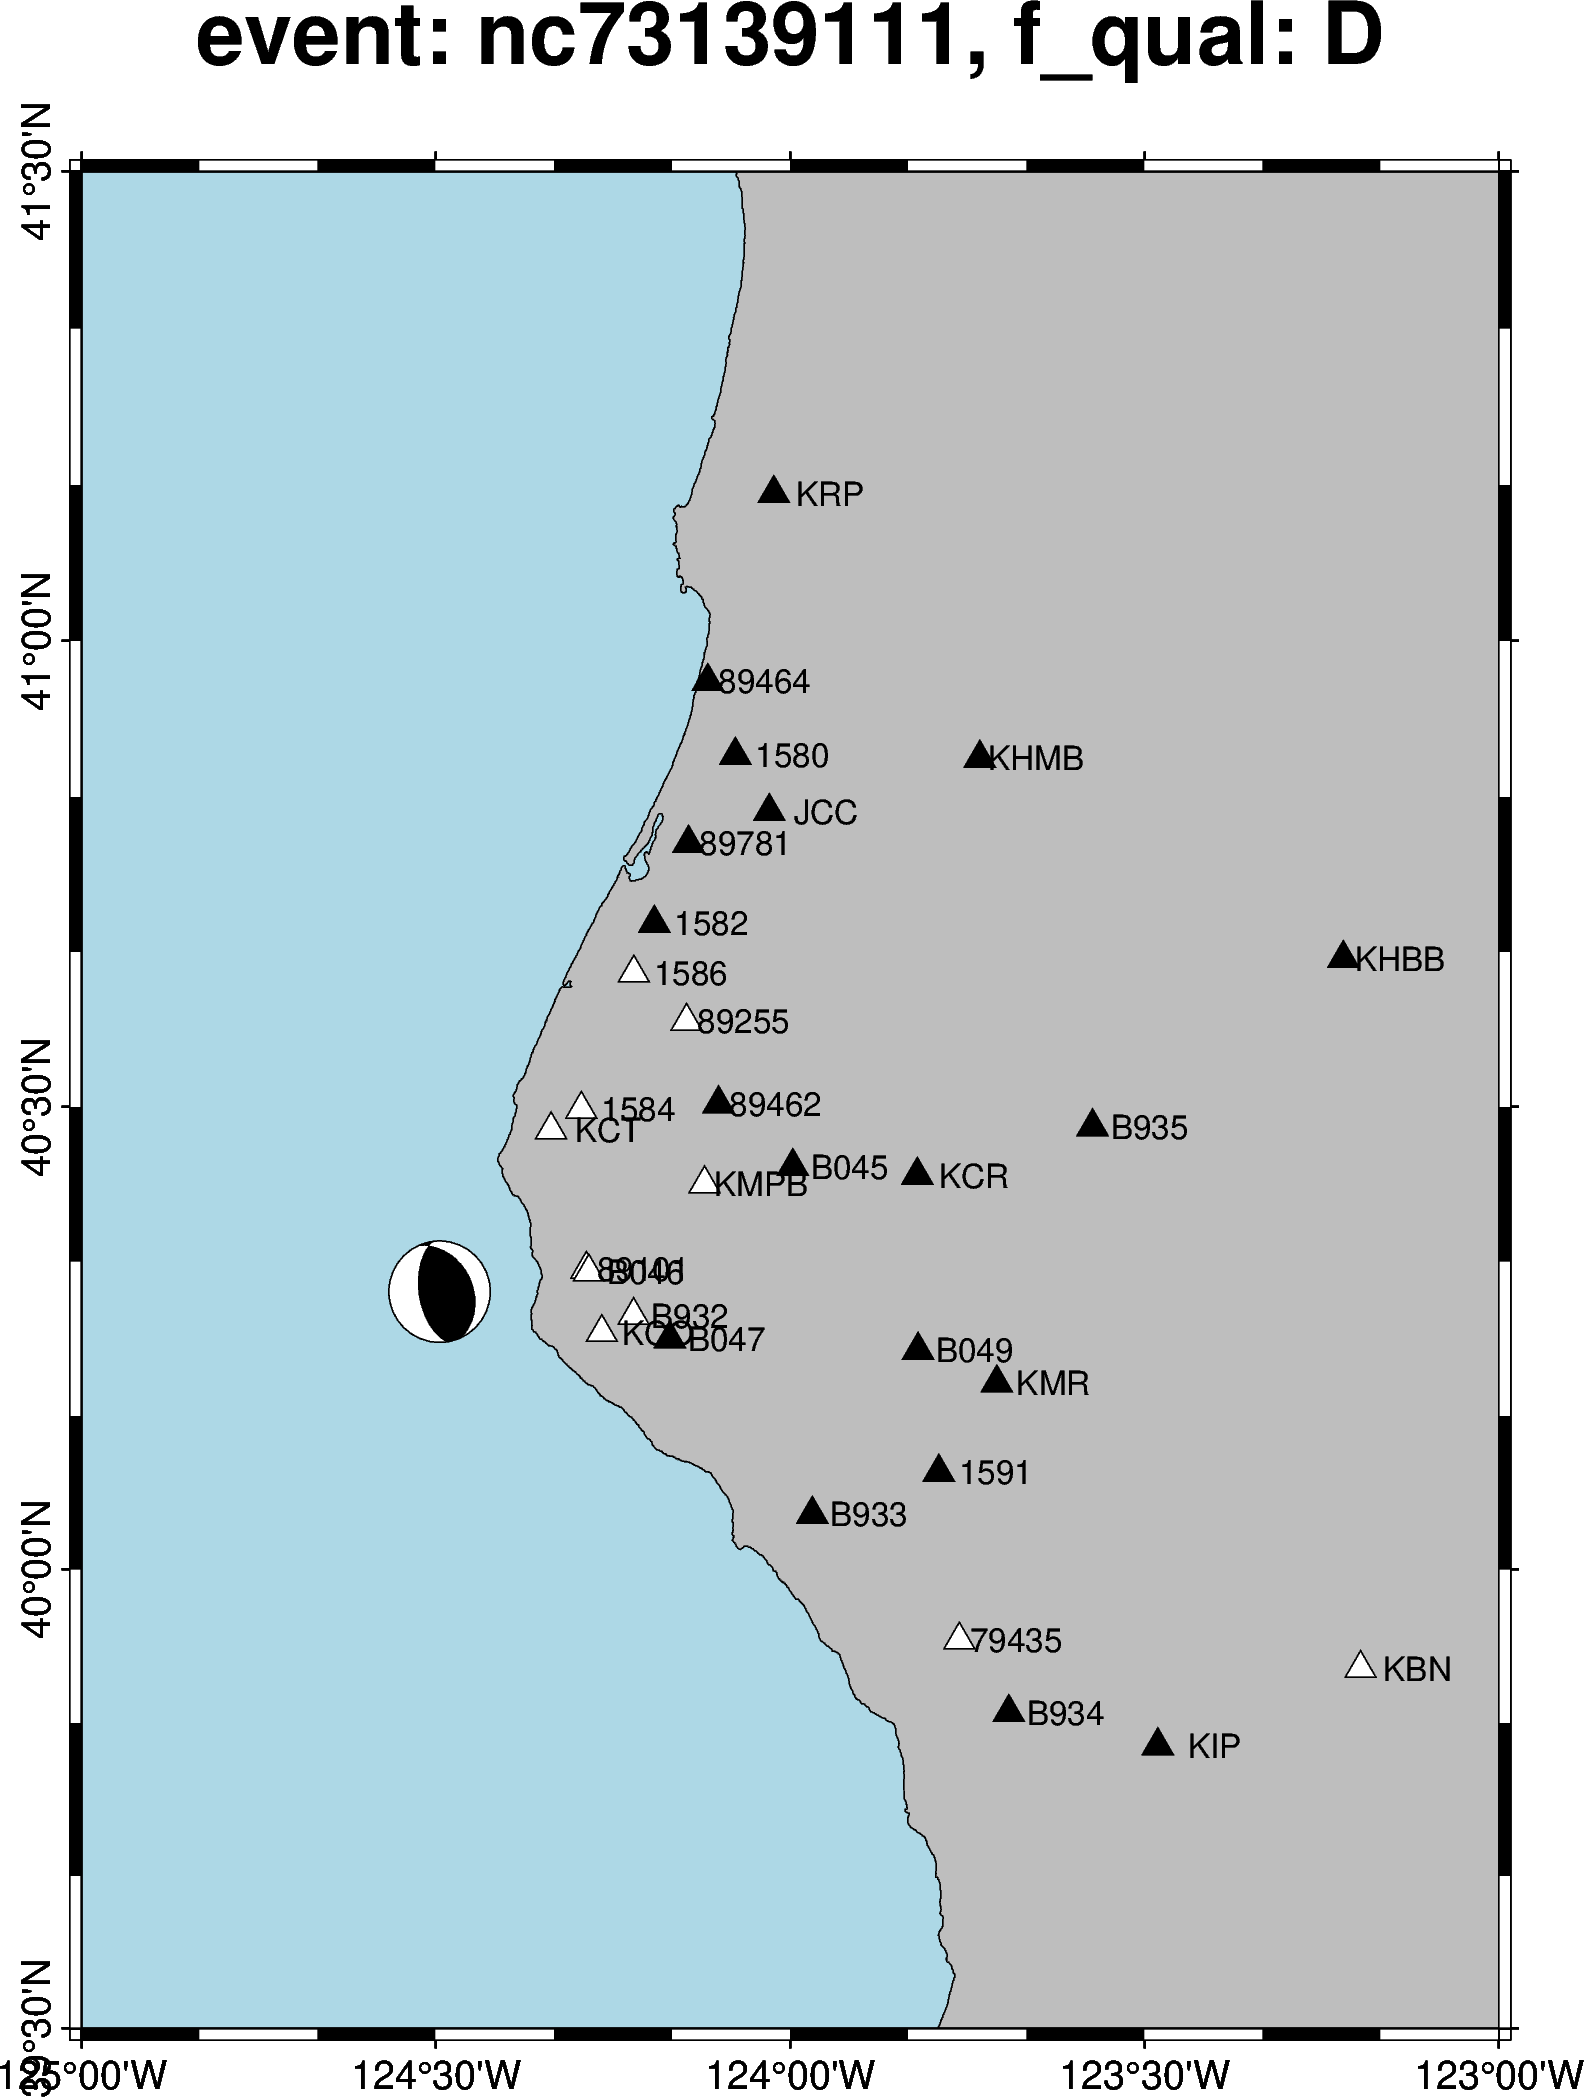

../data/eq_data/nc73201181
(40, 2) (43, 3)


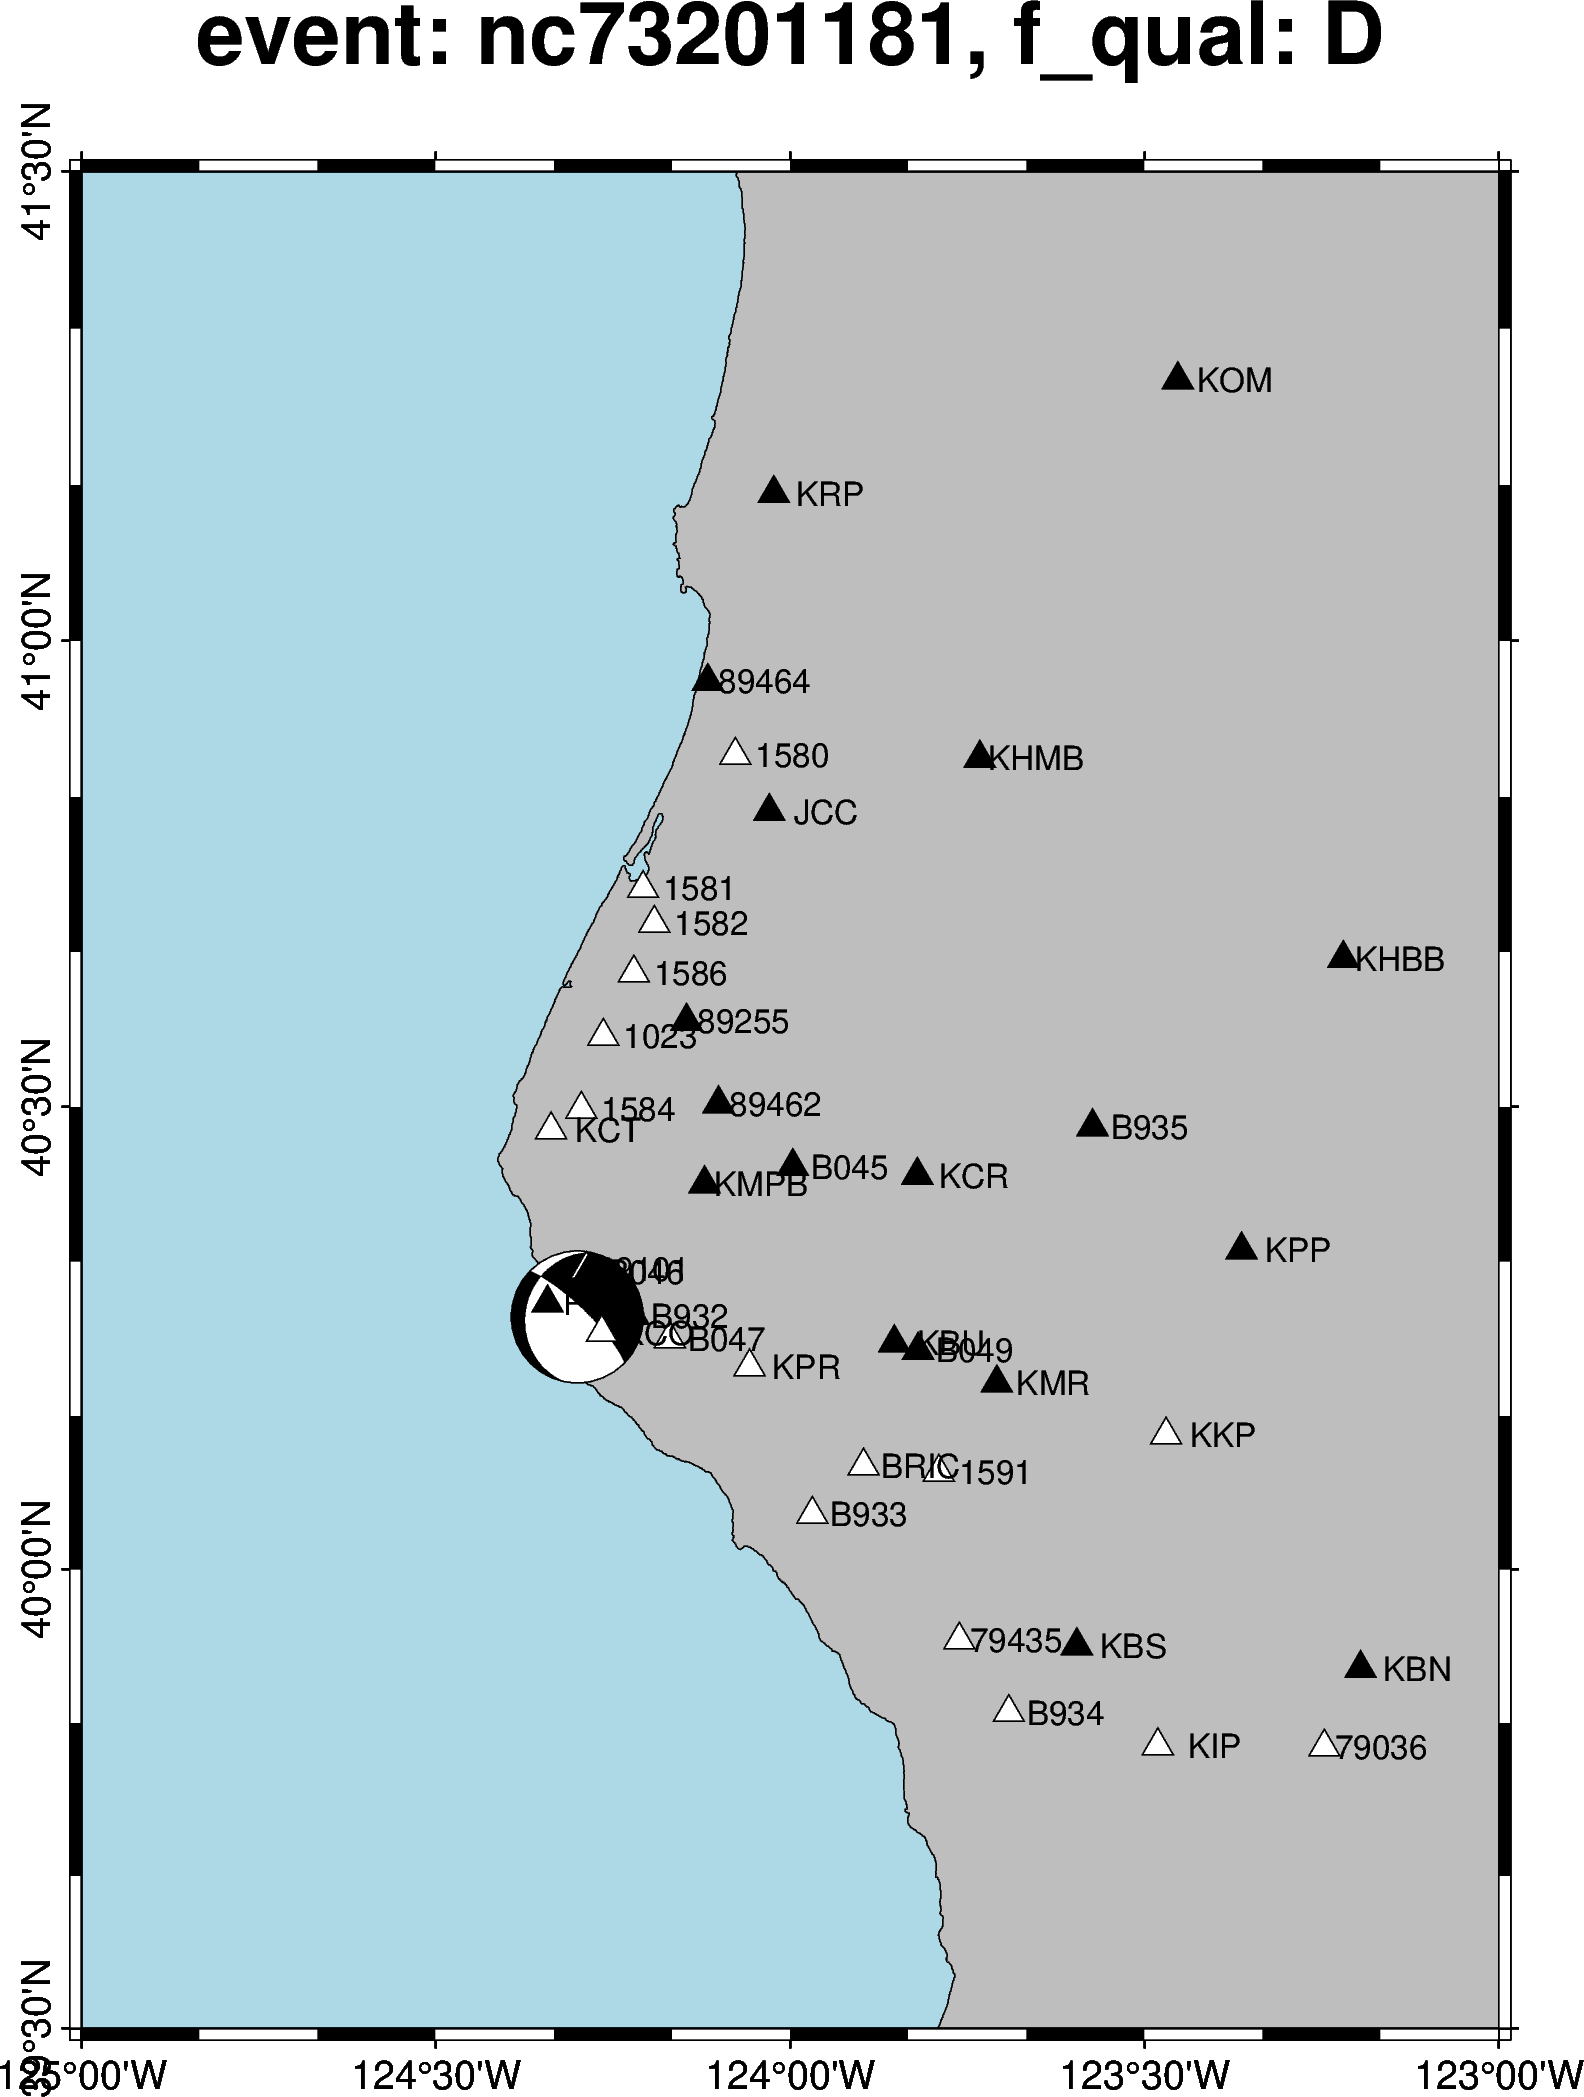

../data/eq_data/nc73311641
(35, 2) (45, 3)


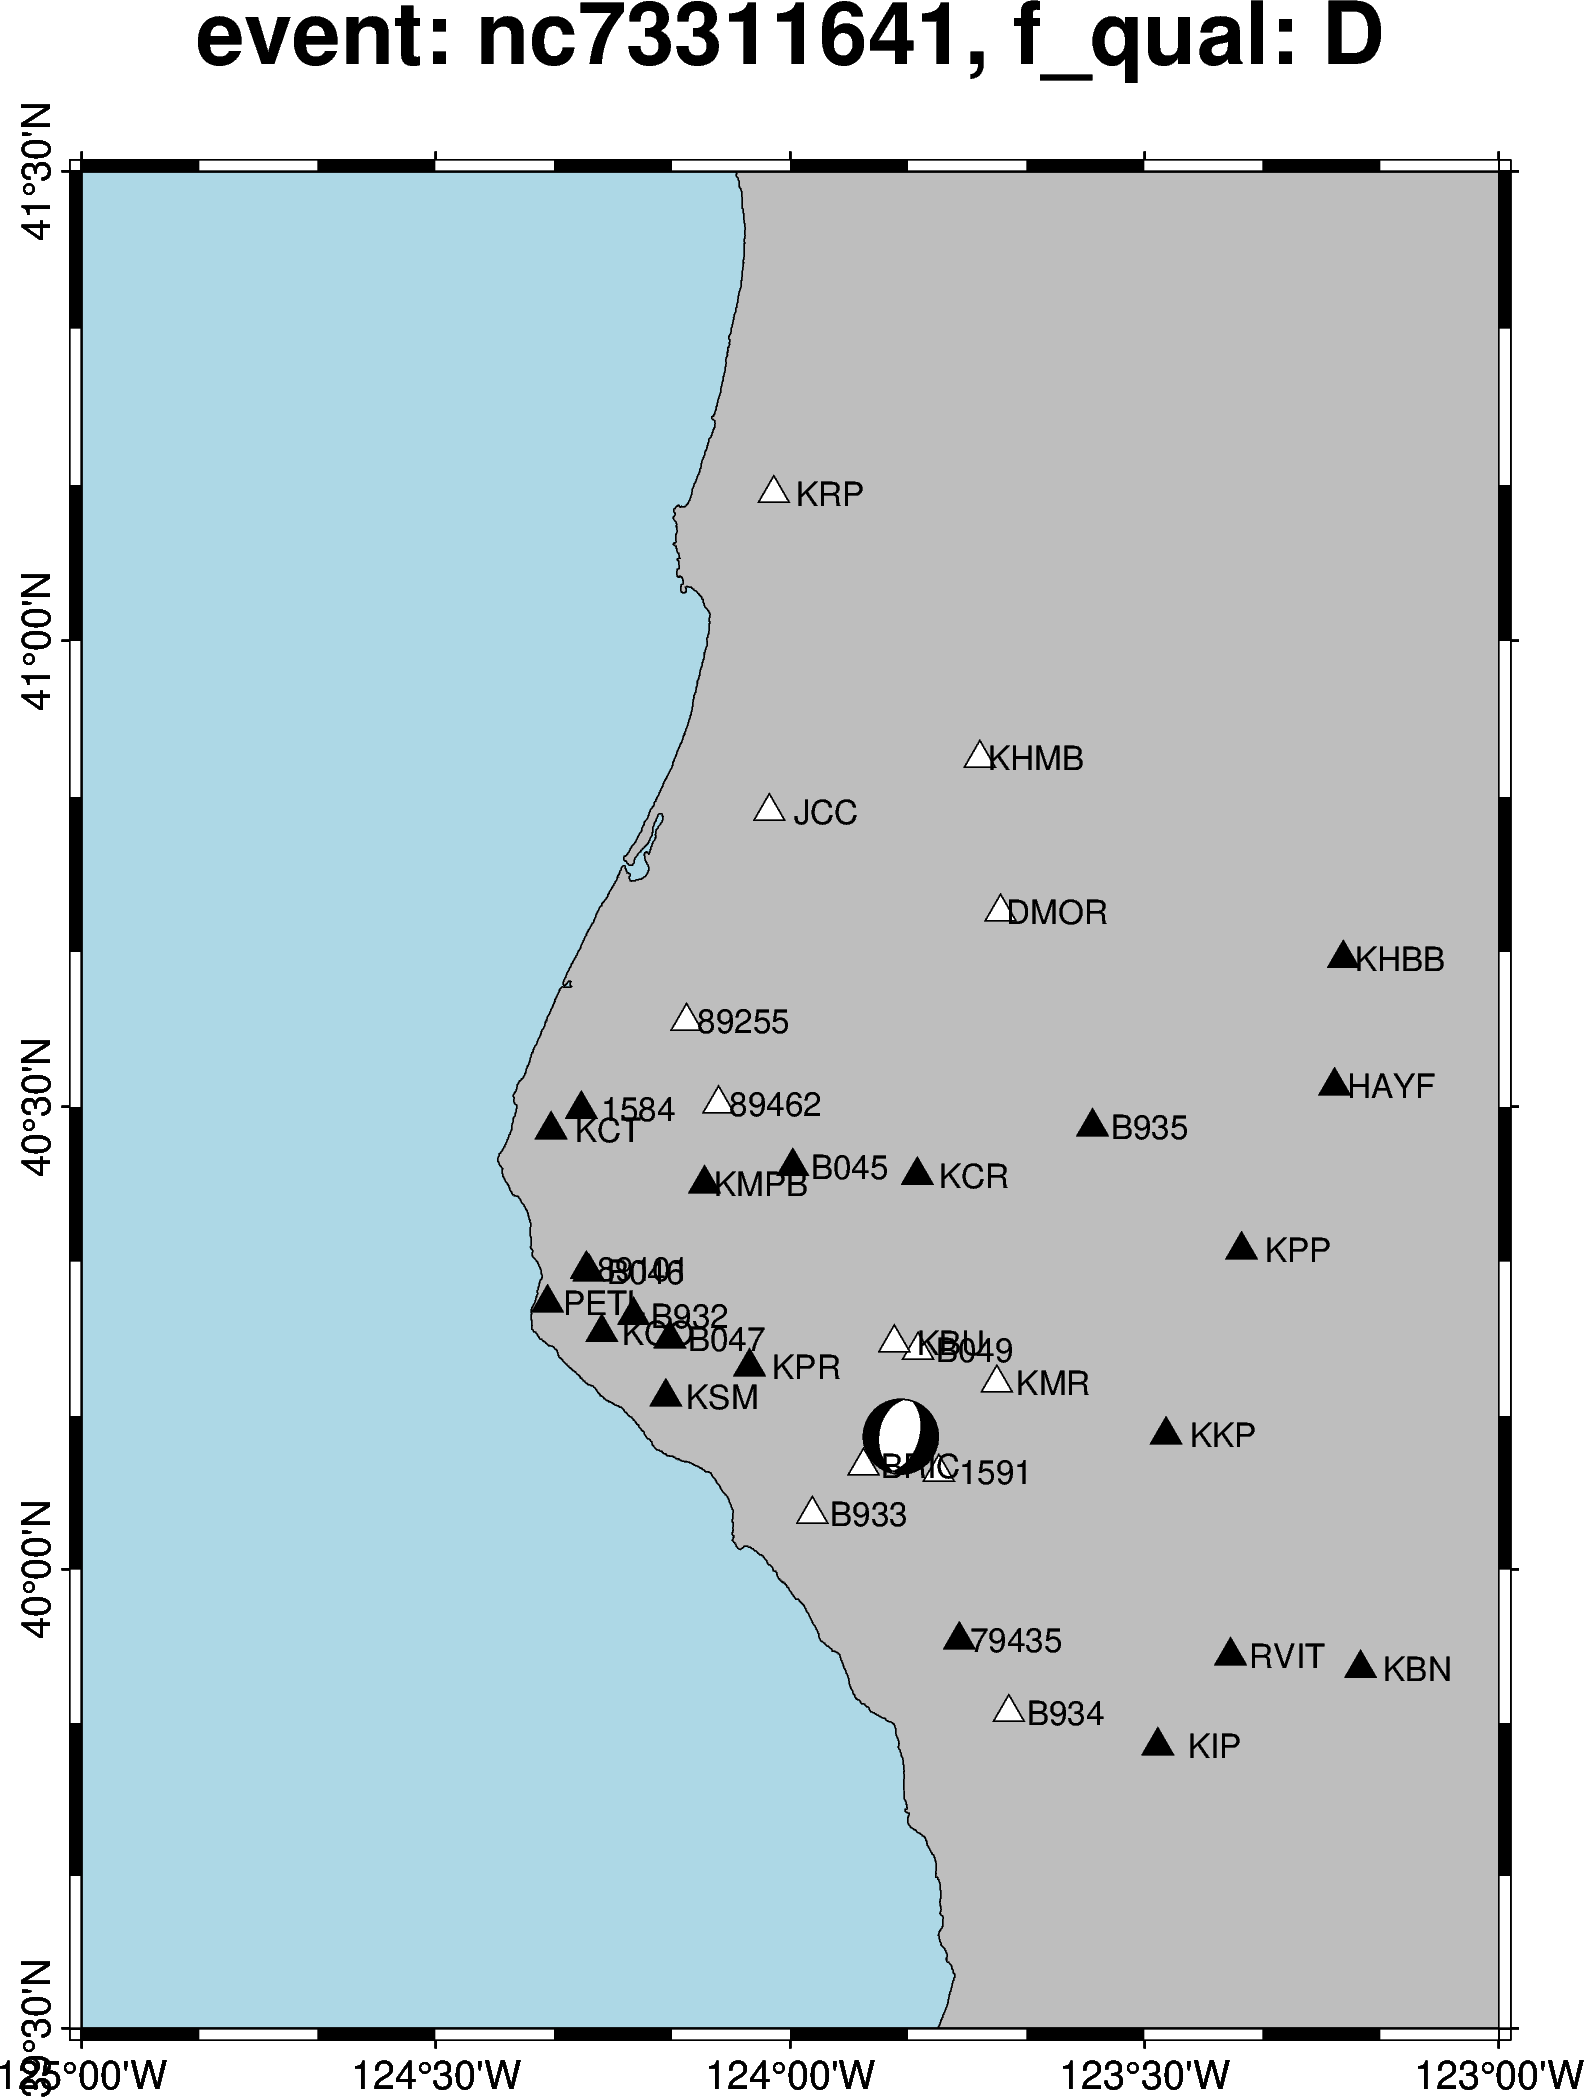

../data/eq_data/nc73629686
(35, 2) (46, 3)


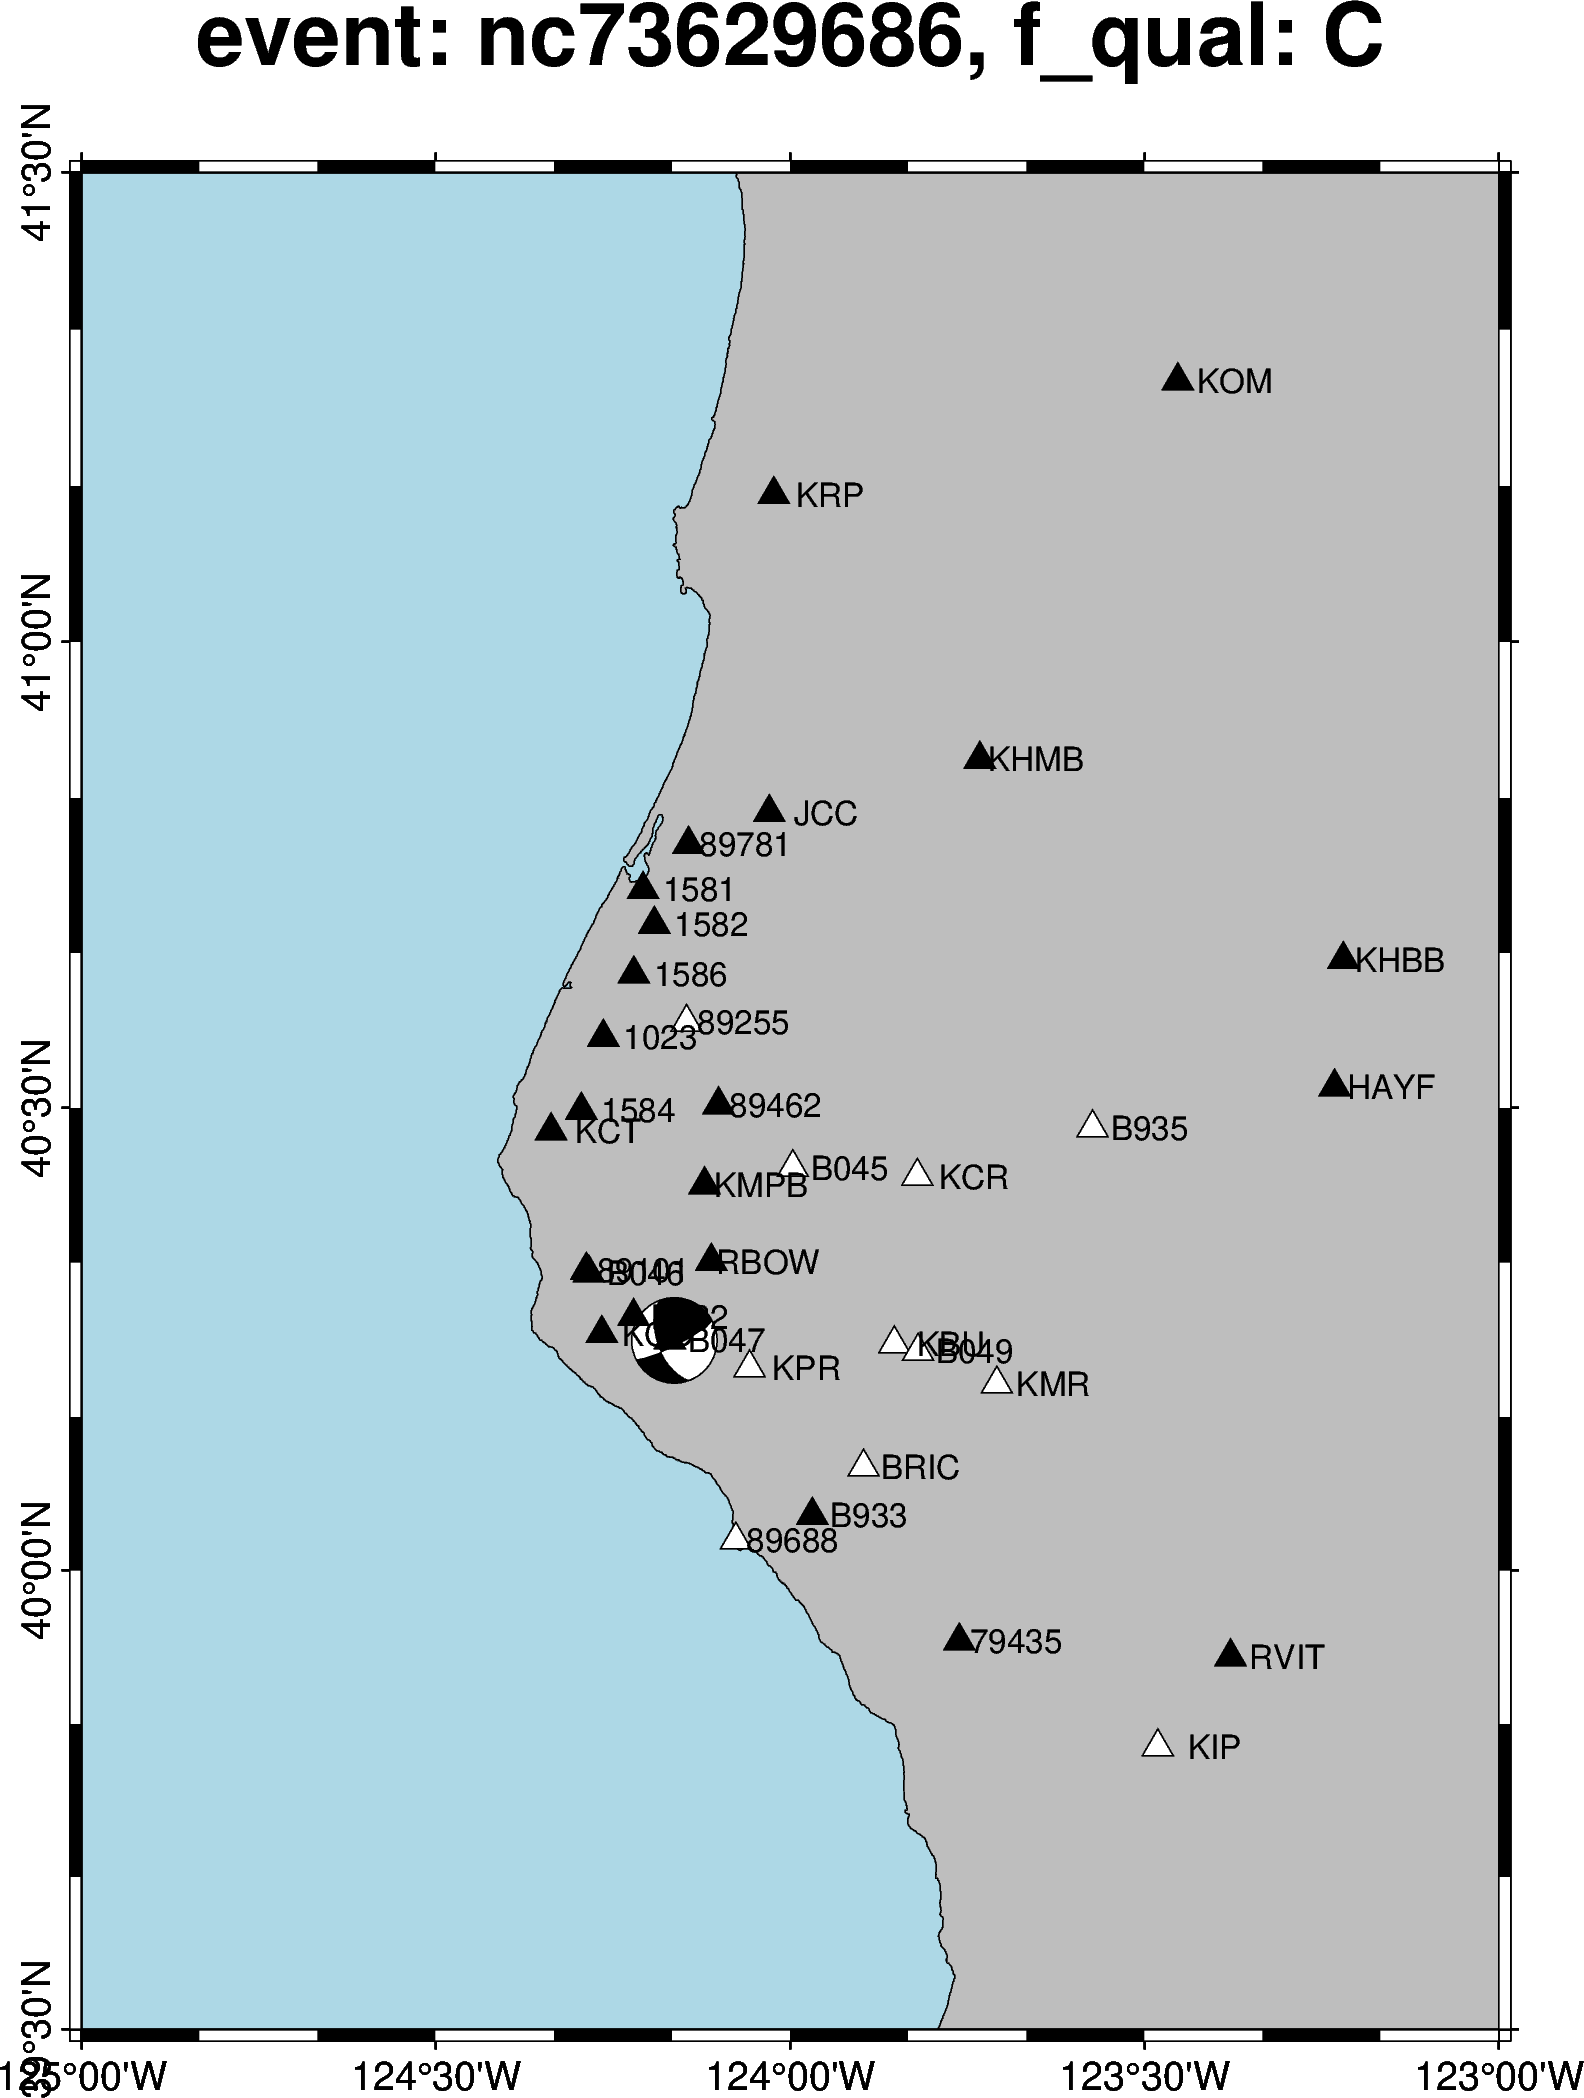

../data/eq_data/nc73783911
(34, 2) (52, 3)


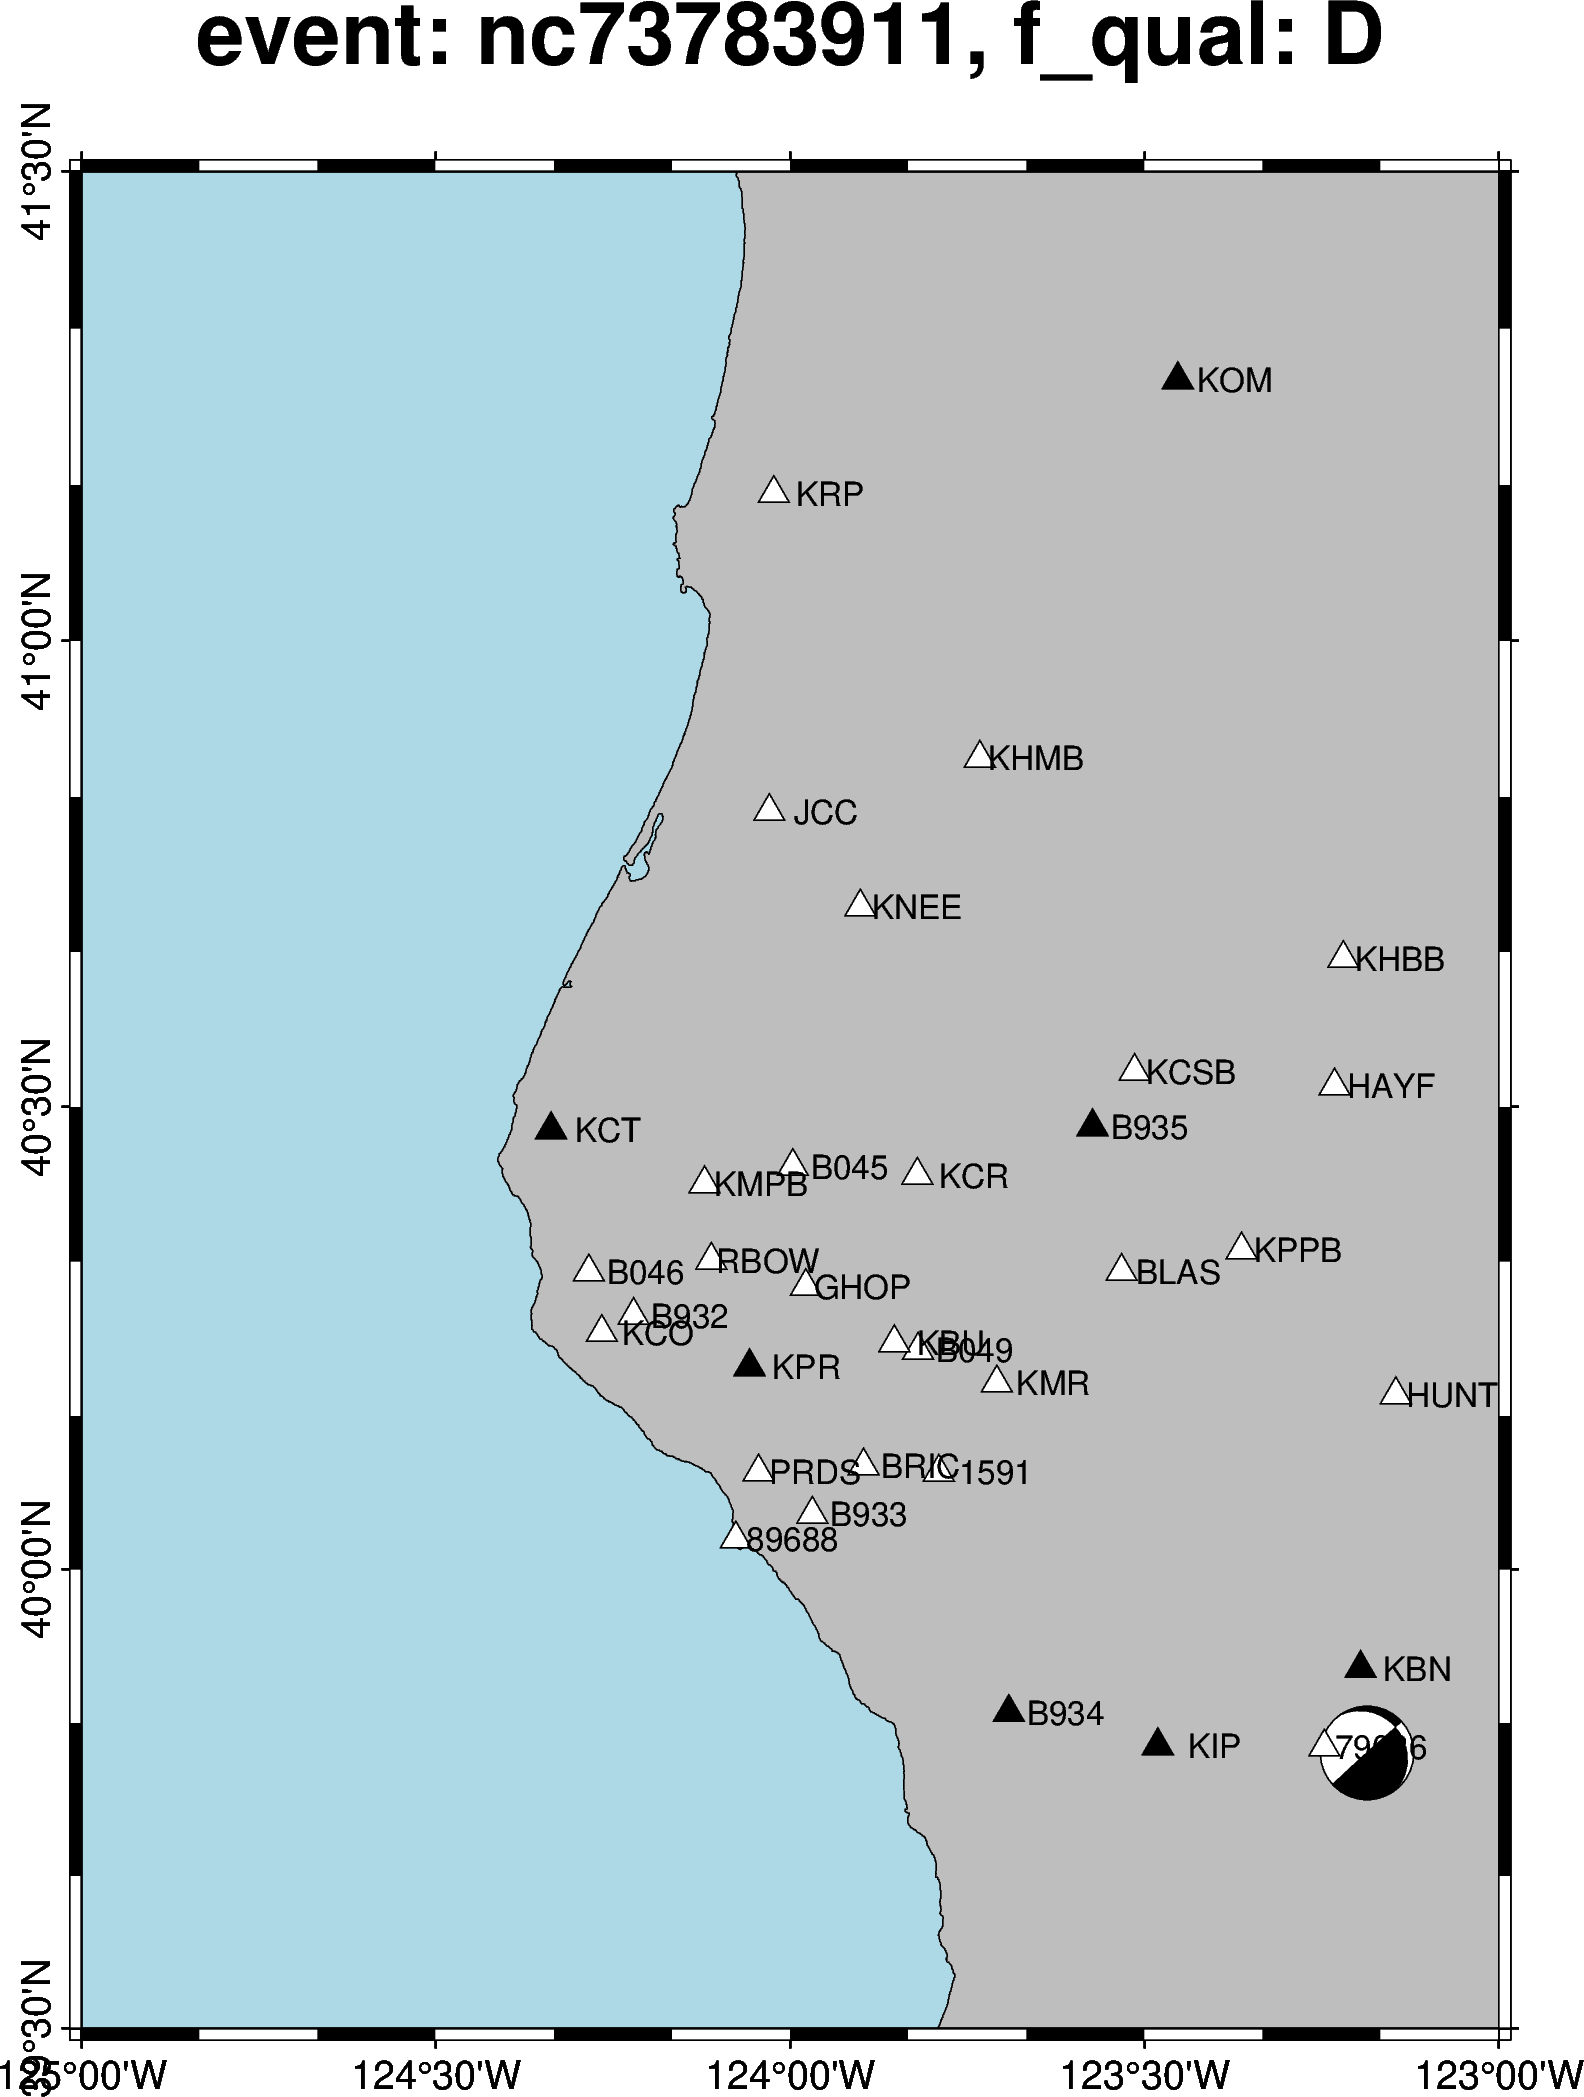

In [52]:
# read the output file
df = pd.read_csv('../data/foc_mech/hash_out_focmech.csv')
df = df.drop_duplicates(subset=['event'])

region = [-125, -123, 39.5, 41.5]   

for i, row in df.iterrows():
    event_id, strike, dip, rake, elat, elon, edep, emag = df['event'][i], df['strike'][i], df['dip'][i], df['rake'][i], df['elat'][i], df['elon'][i], df['edep'][i], df['mag'][i]
    f_qual = df['f_qual'][i]
    event_path = f'../data/eq_data/{event_id}'
    print(event_path)

    # get stname, stlat, stlon, polarity (U/D)
    st_pol_loc_df = step4.get_polarity2(event_path, event_id)

    fig = step4.plot_focal(region, strike, dip, rake, elat, elon, edep, magnitude=emag)
    
    # # plot all the stations
    # fig.plot(x=st_pol_loc_df['Longitude'],
    #         y=st_pol_loc_df['Latitude'],
    #         style="t0.3c", 
    #         fill="grey", 
    #         pen="black"
    # )
    
    # plot the polarity based triangles, black for compressional, white for dilatational
    for i, row in st_pol_loc_df.iterrows():
        if row['Polarity'] == 'U': # positive polarity, compressional wave, filled circle
            fig.plot(x=row['Longitude'], y=row['Latitude'], style="t0.3c", fill='black', pen='black')

        elif row['Polarity'] == 'D': # negative polarity, dilatational wave, empty circle
            fig.plot(x=row['Longitude'], y=row['Latitude'], style="t0.3c", fill='white', pen='black')

        else:
            continue
    # plot the station names
    fig.text(x=st_pol_loc_df['Longitude']+0.08, y=st_pol_loc_df['Latitude'],text=st_pol_loc_df['Station'], font='8p')

    # overlay the focal mechanism again to keep it on top
    # pass the focal mechanism data to meca in addition to the scale and event location
    # focal_mechanism = dict(strike=strike, dip=dip, rake=rake, magnitude=3)
    # fig.meca(focal_mechanism, scale="1c", longitude=elon, latitude=elat, depth=edep)

    # title and axis label of the plot
    fig.basemap(frame=[f"+tevent: {event_id}, f_qual: {f_qual}"])

    # fig.savefig(f'png/Focal_mechanism_{event_id}.png')

    fig.show()

    # break



# SKHASH plot

../data/eq_data/nc40216664
(24, 2) (24, 3)


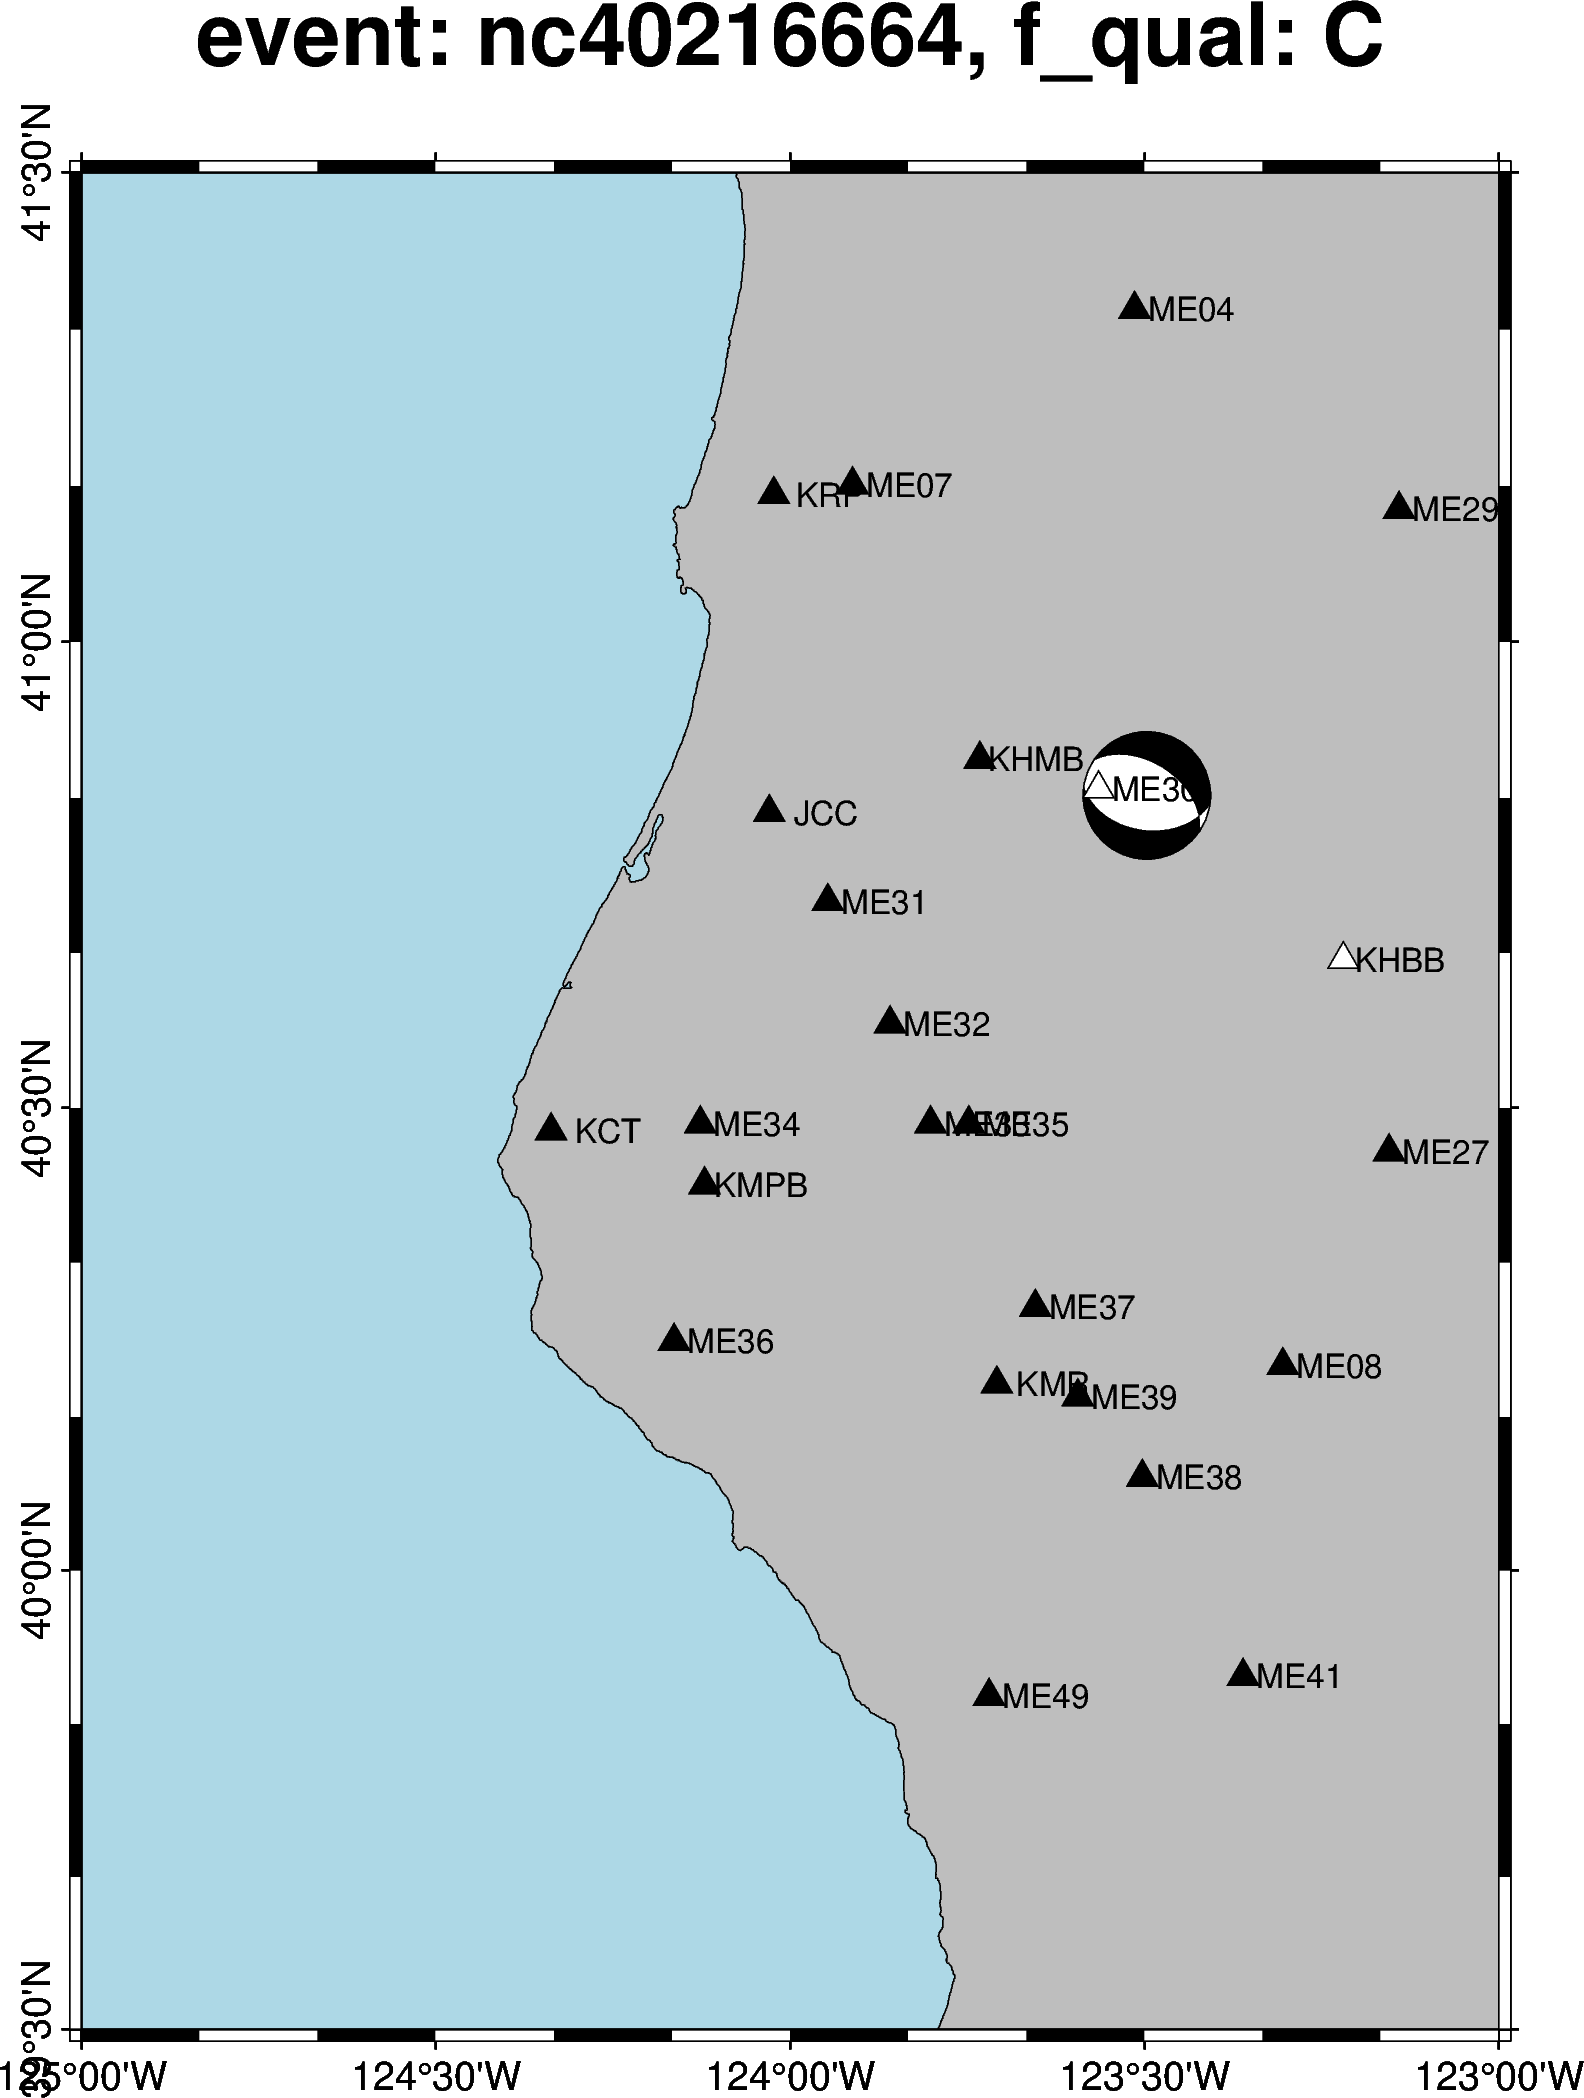

../data/eq_data/nc71349716
(15, 2) (15, 3)


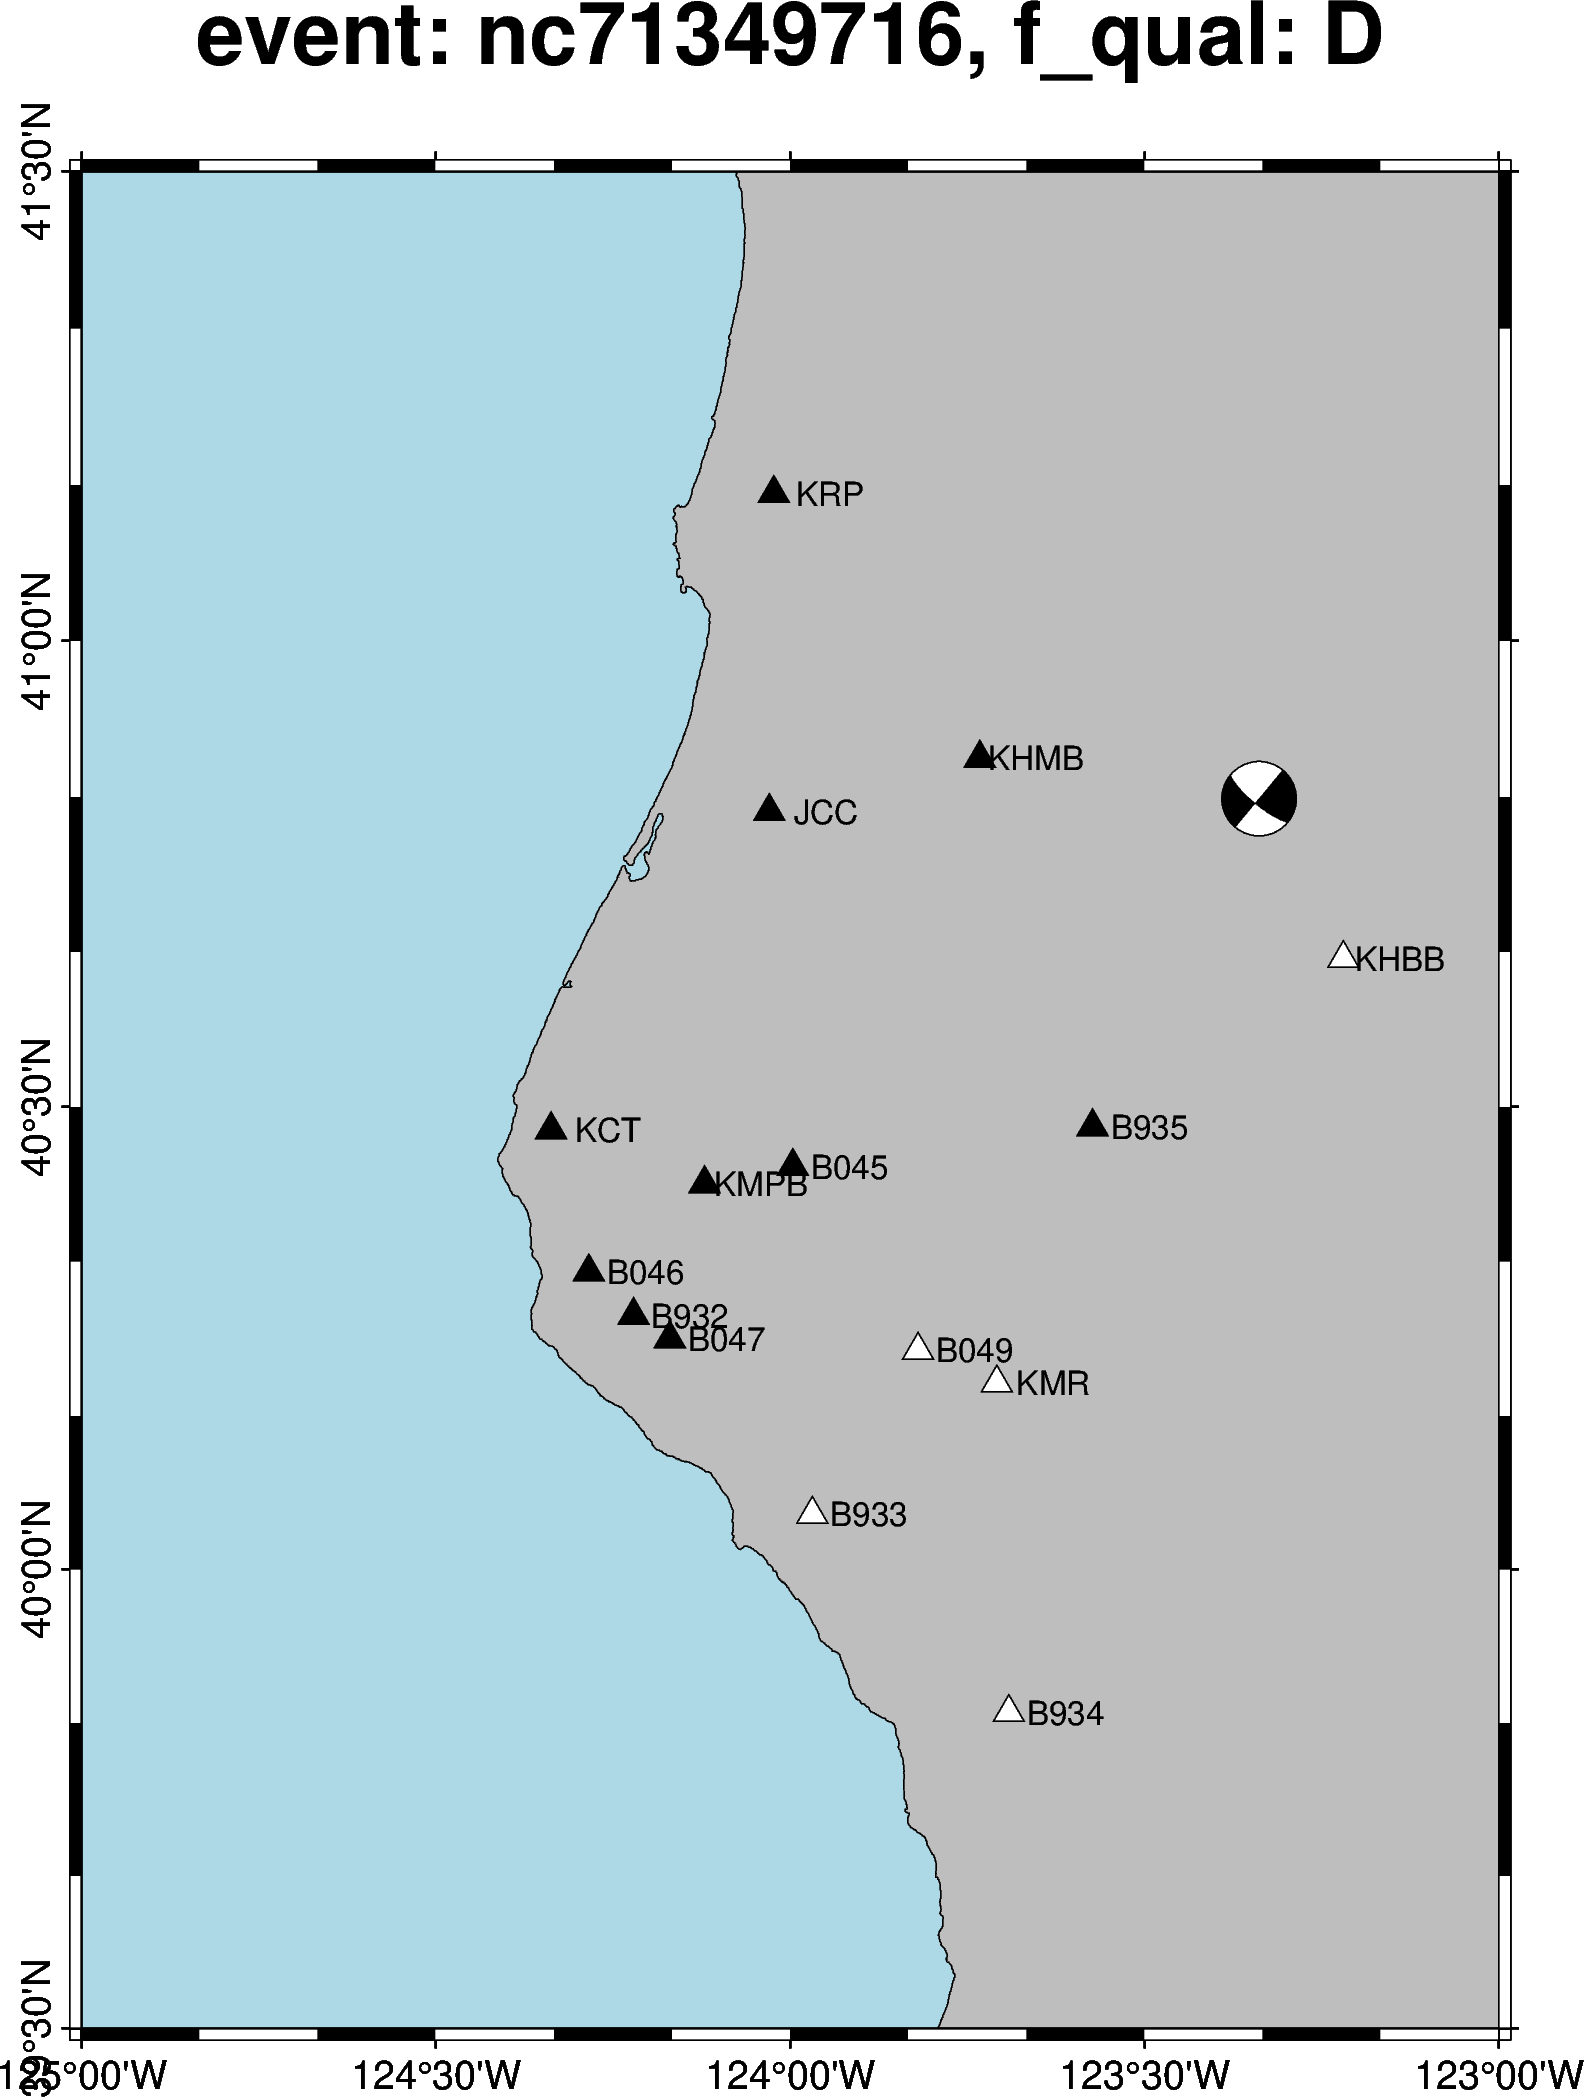

../data/eq_data/nc72322146
(48, 2) (57, 3)


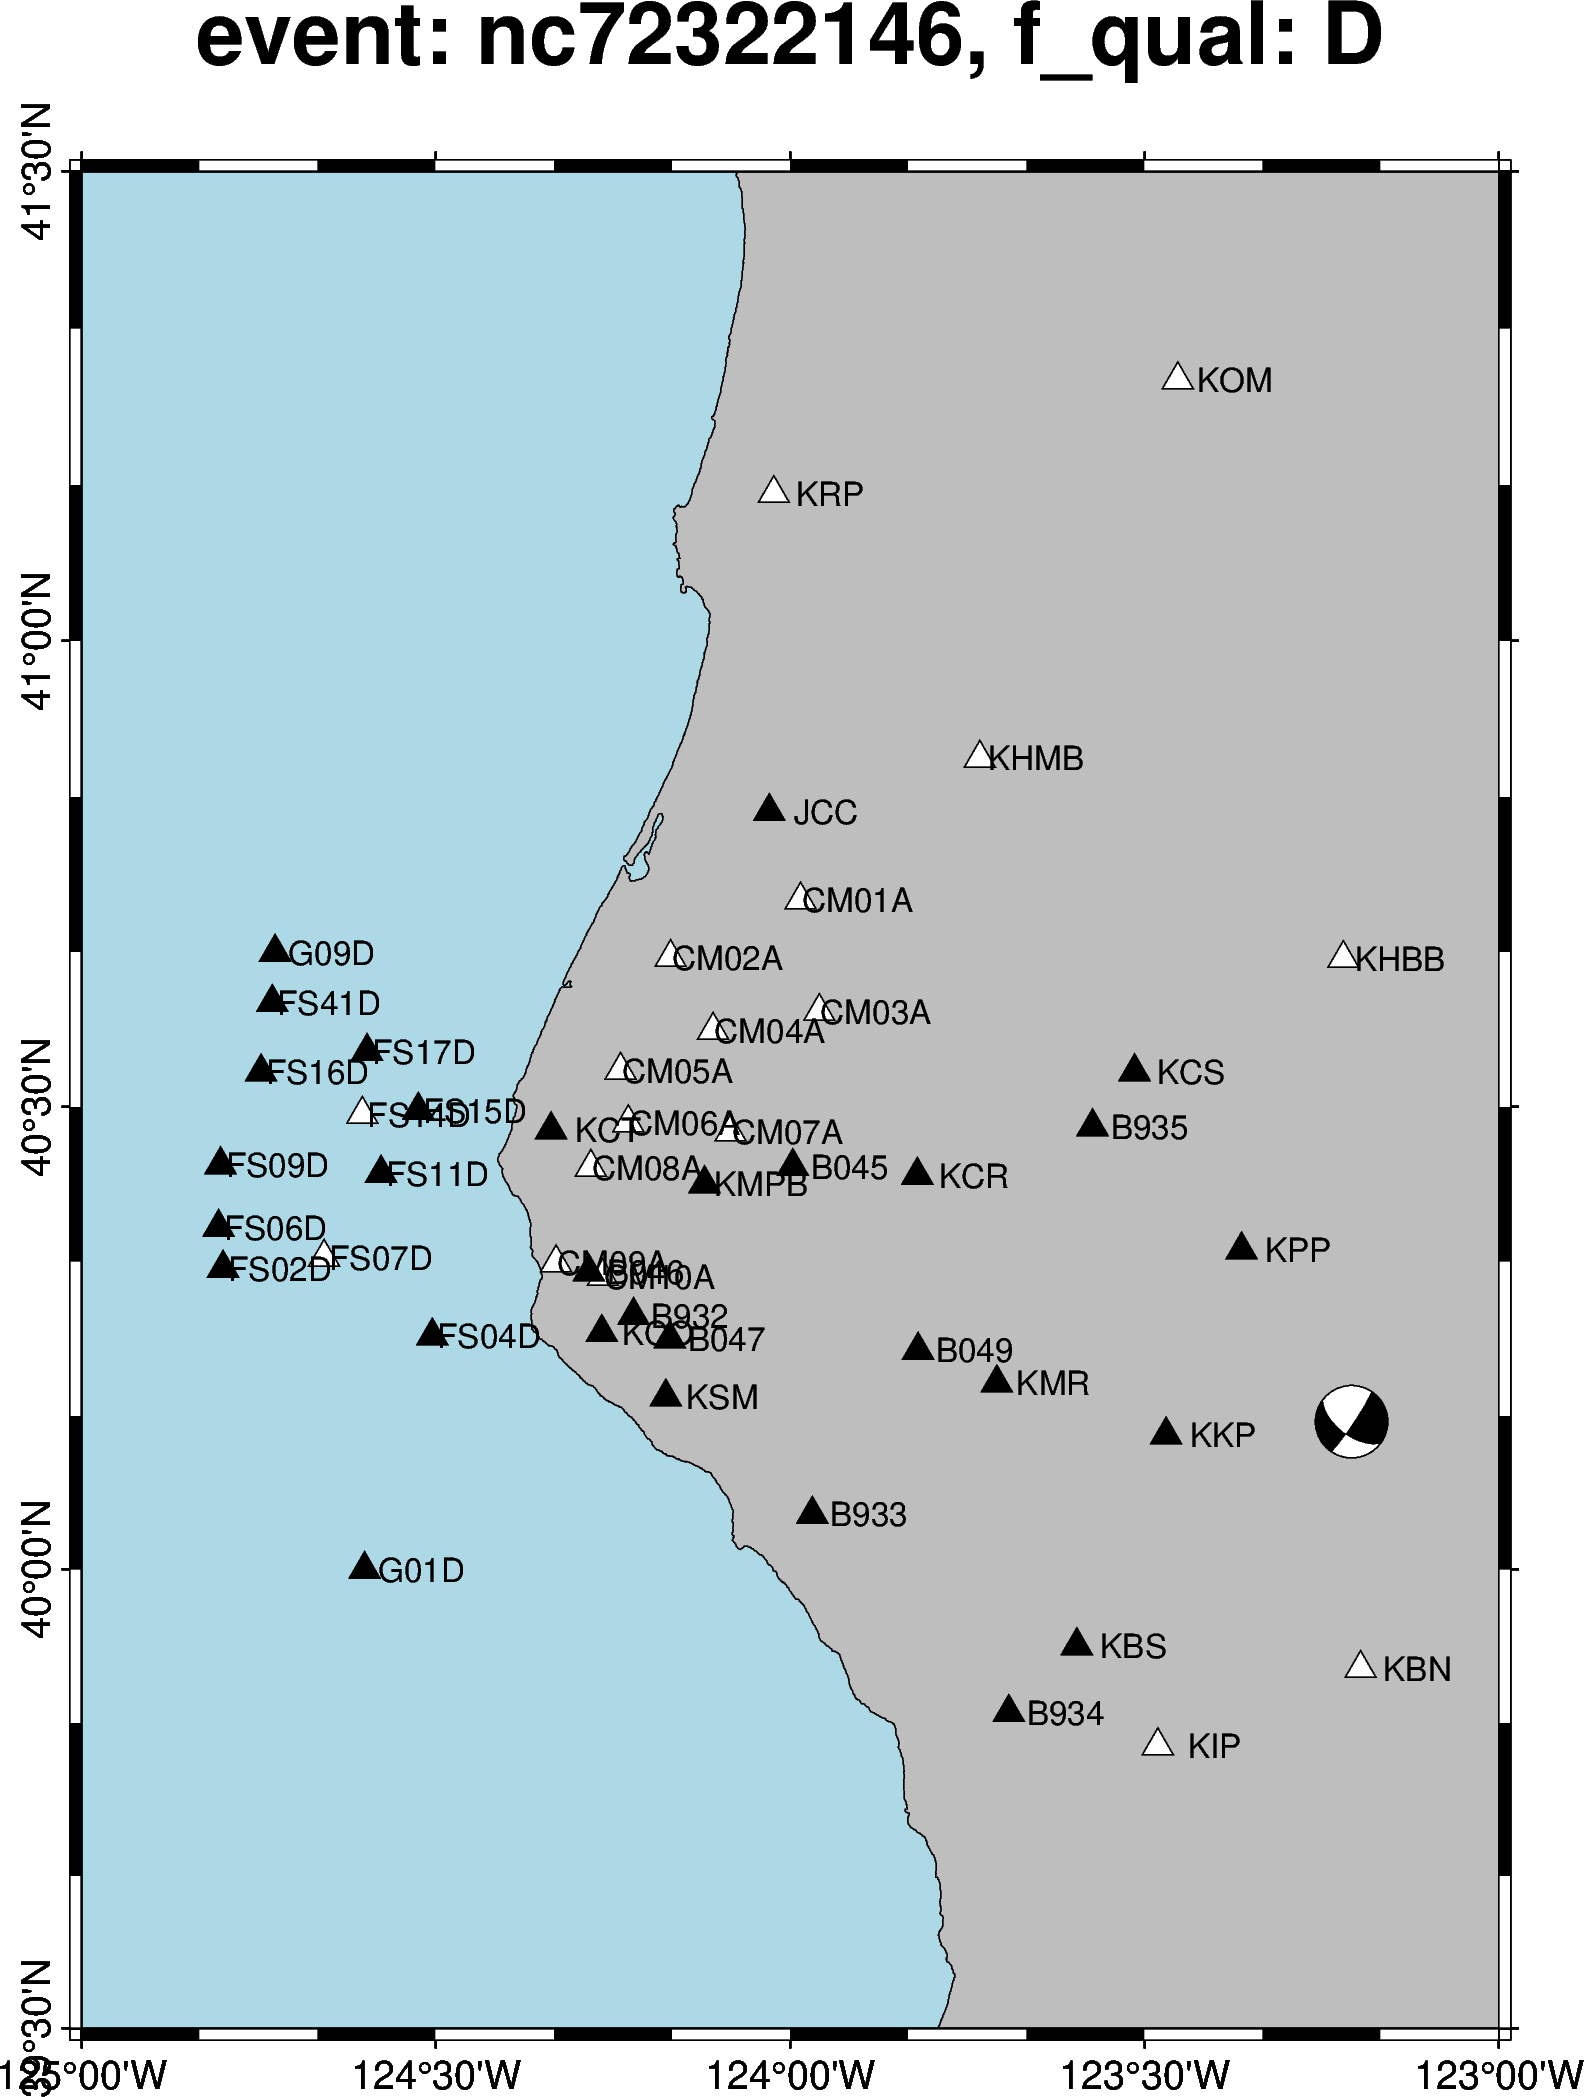

../data/eq_data/nc72946846
(20, 2) (35, 3)


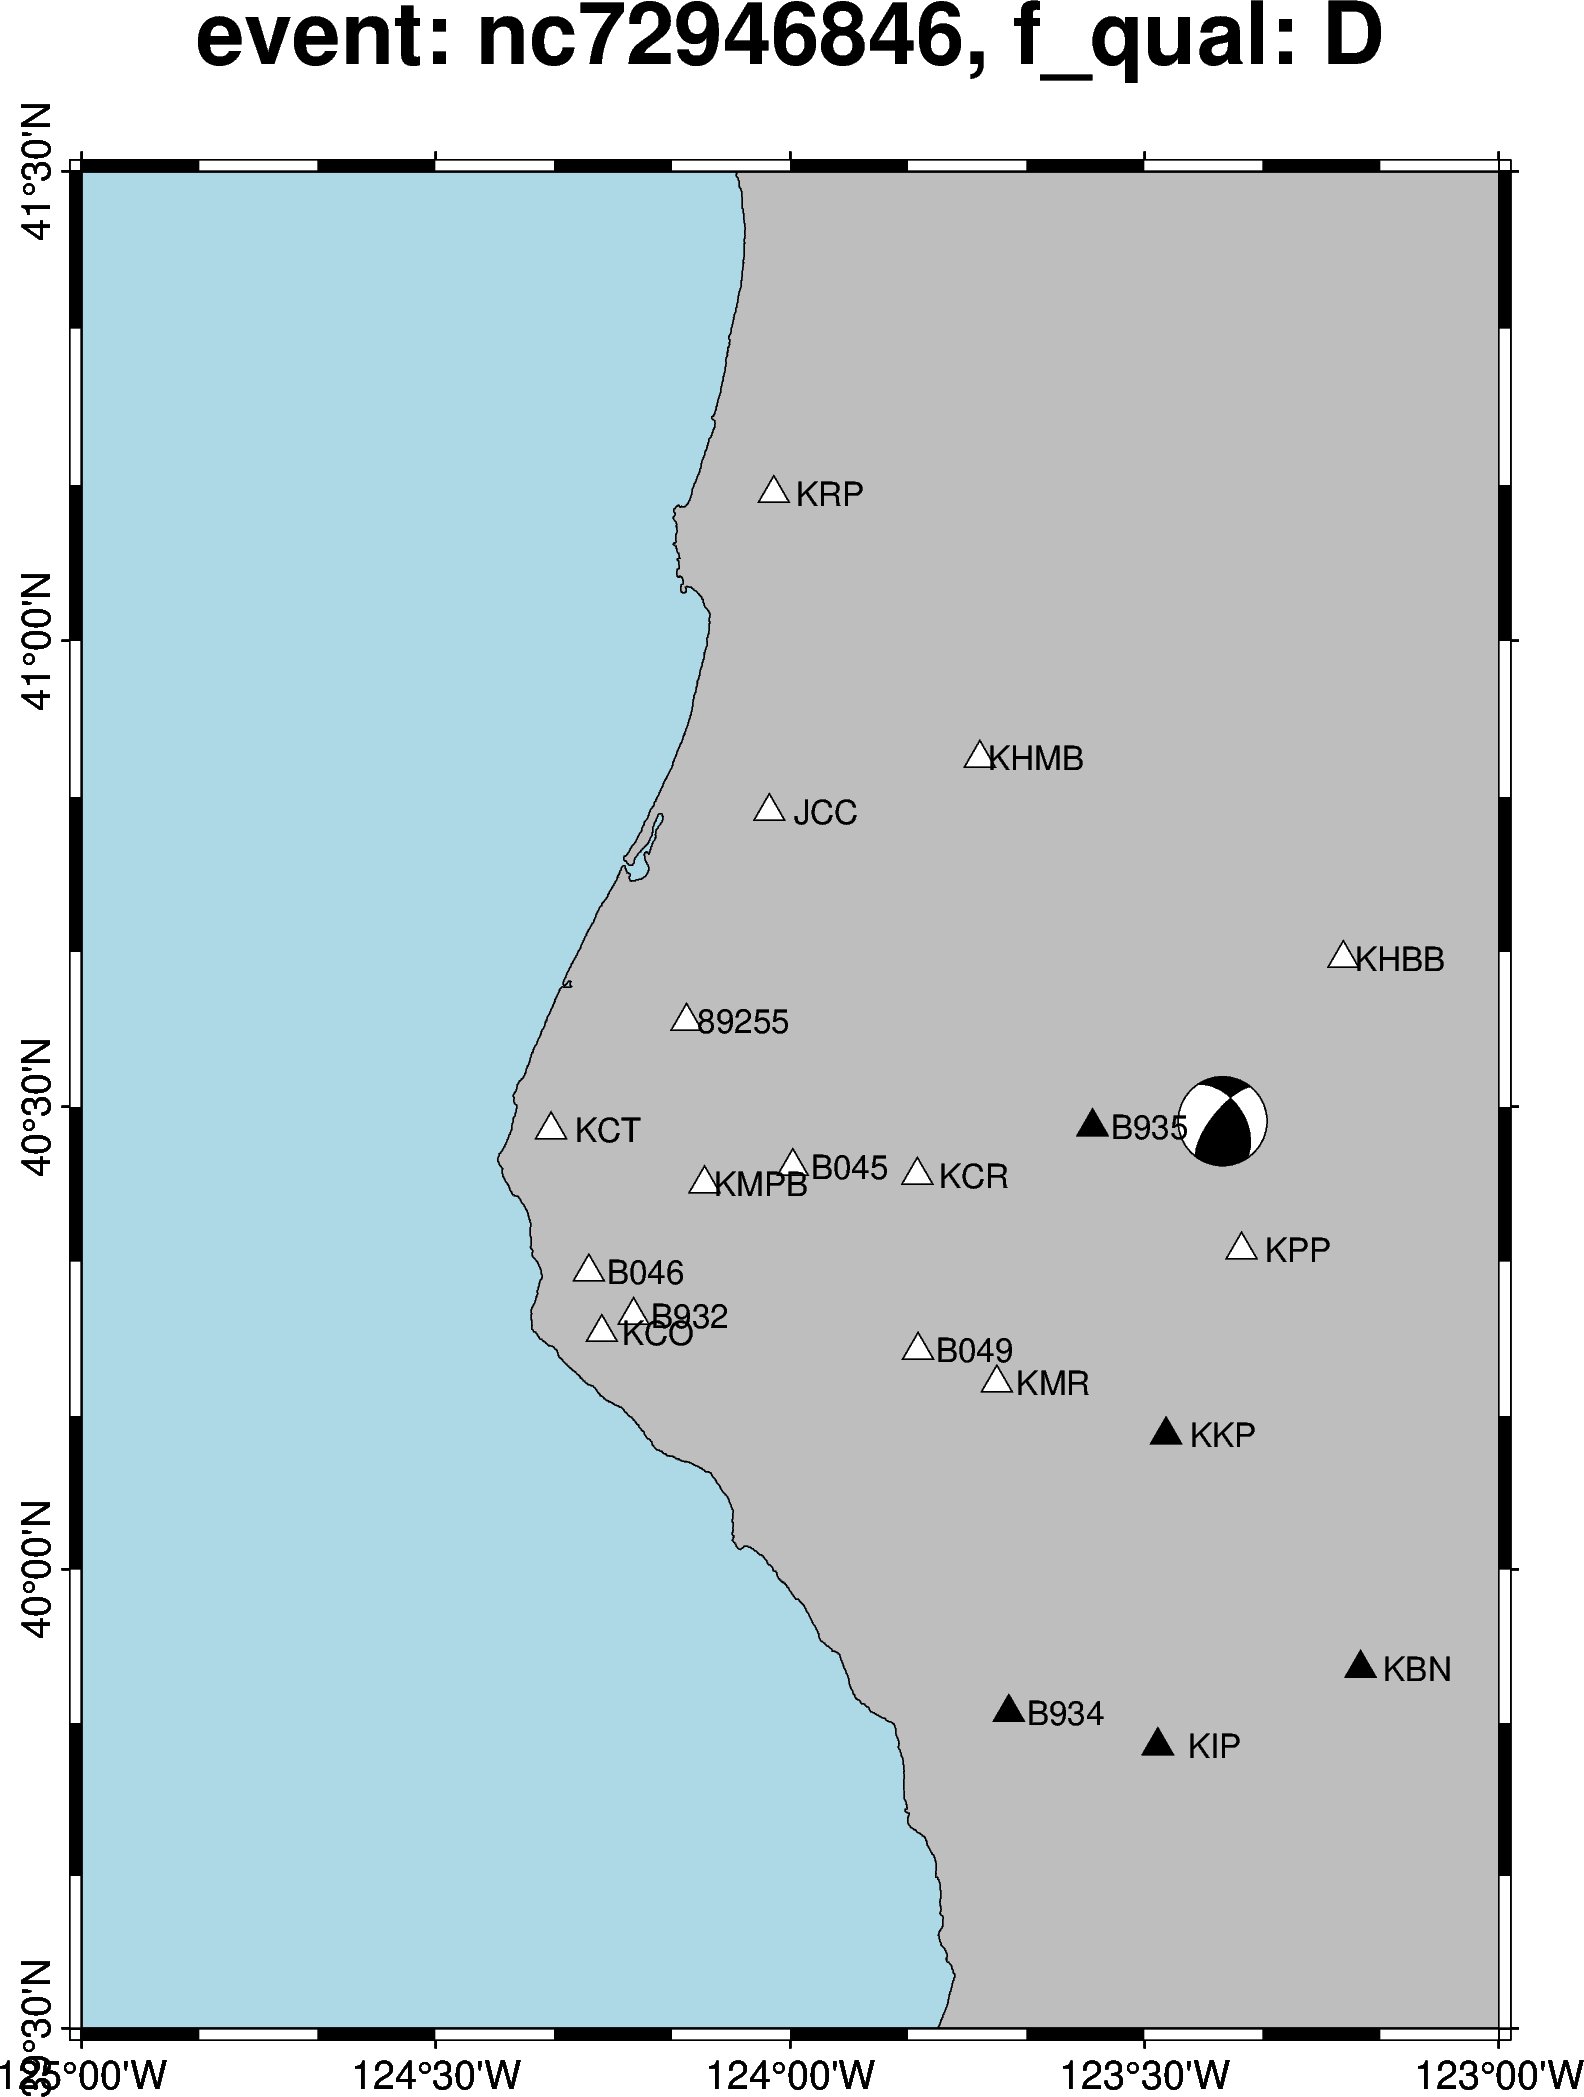

../data/eq_data/nc73024816
(19, 2) (36, 3)


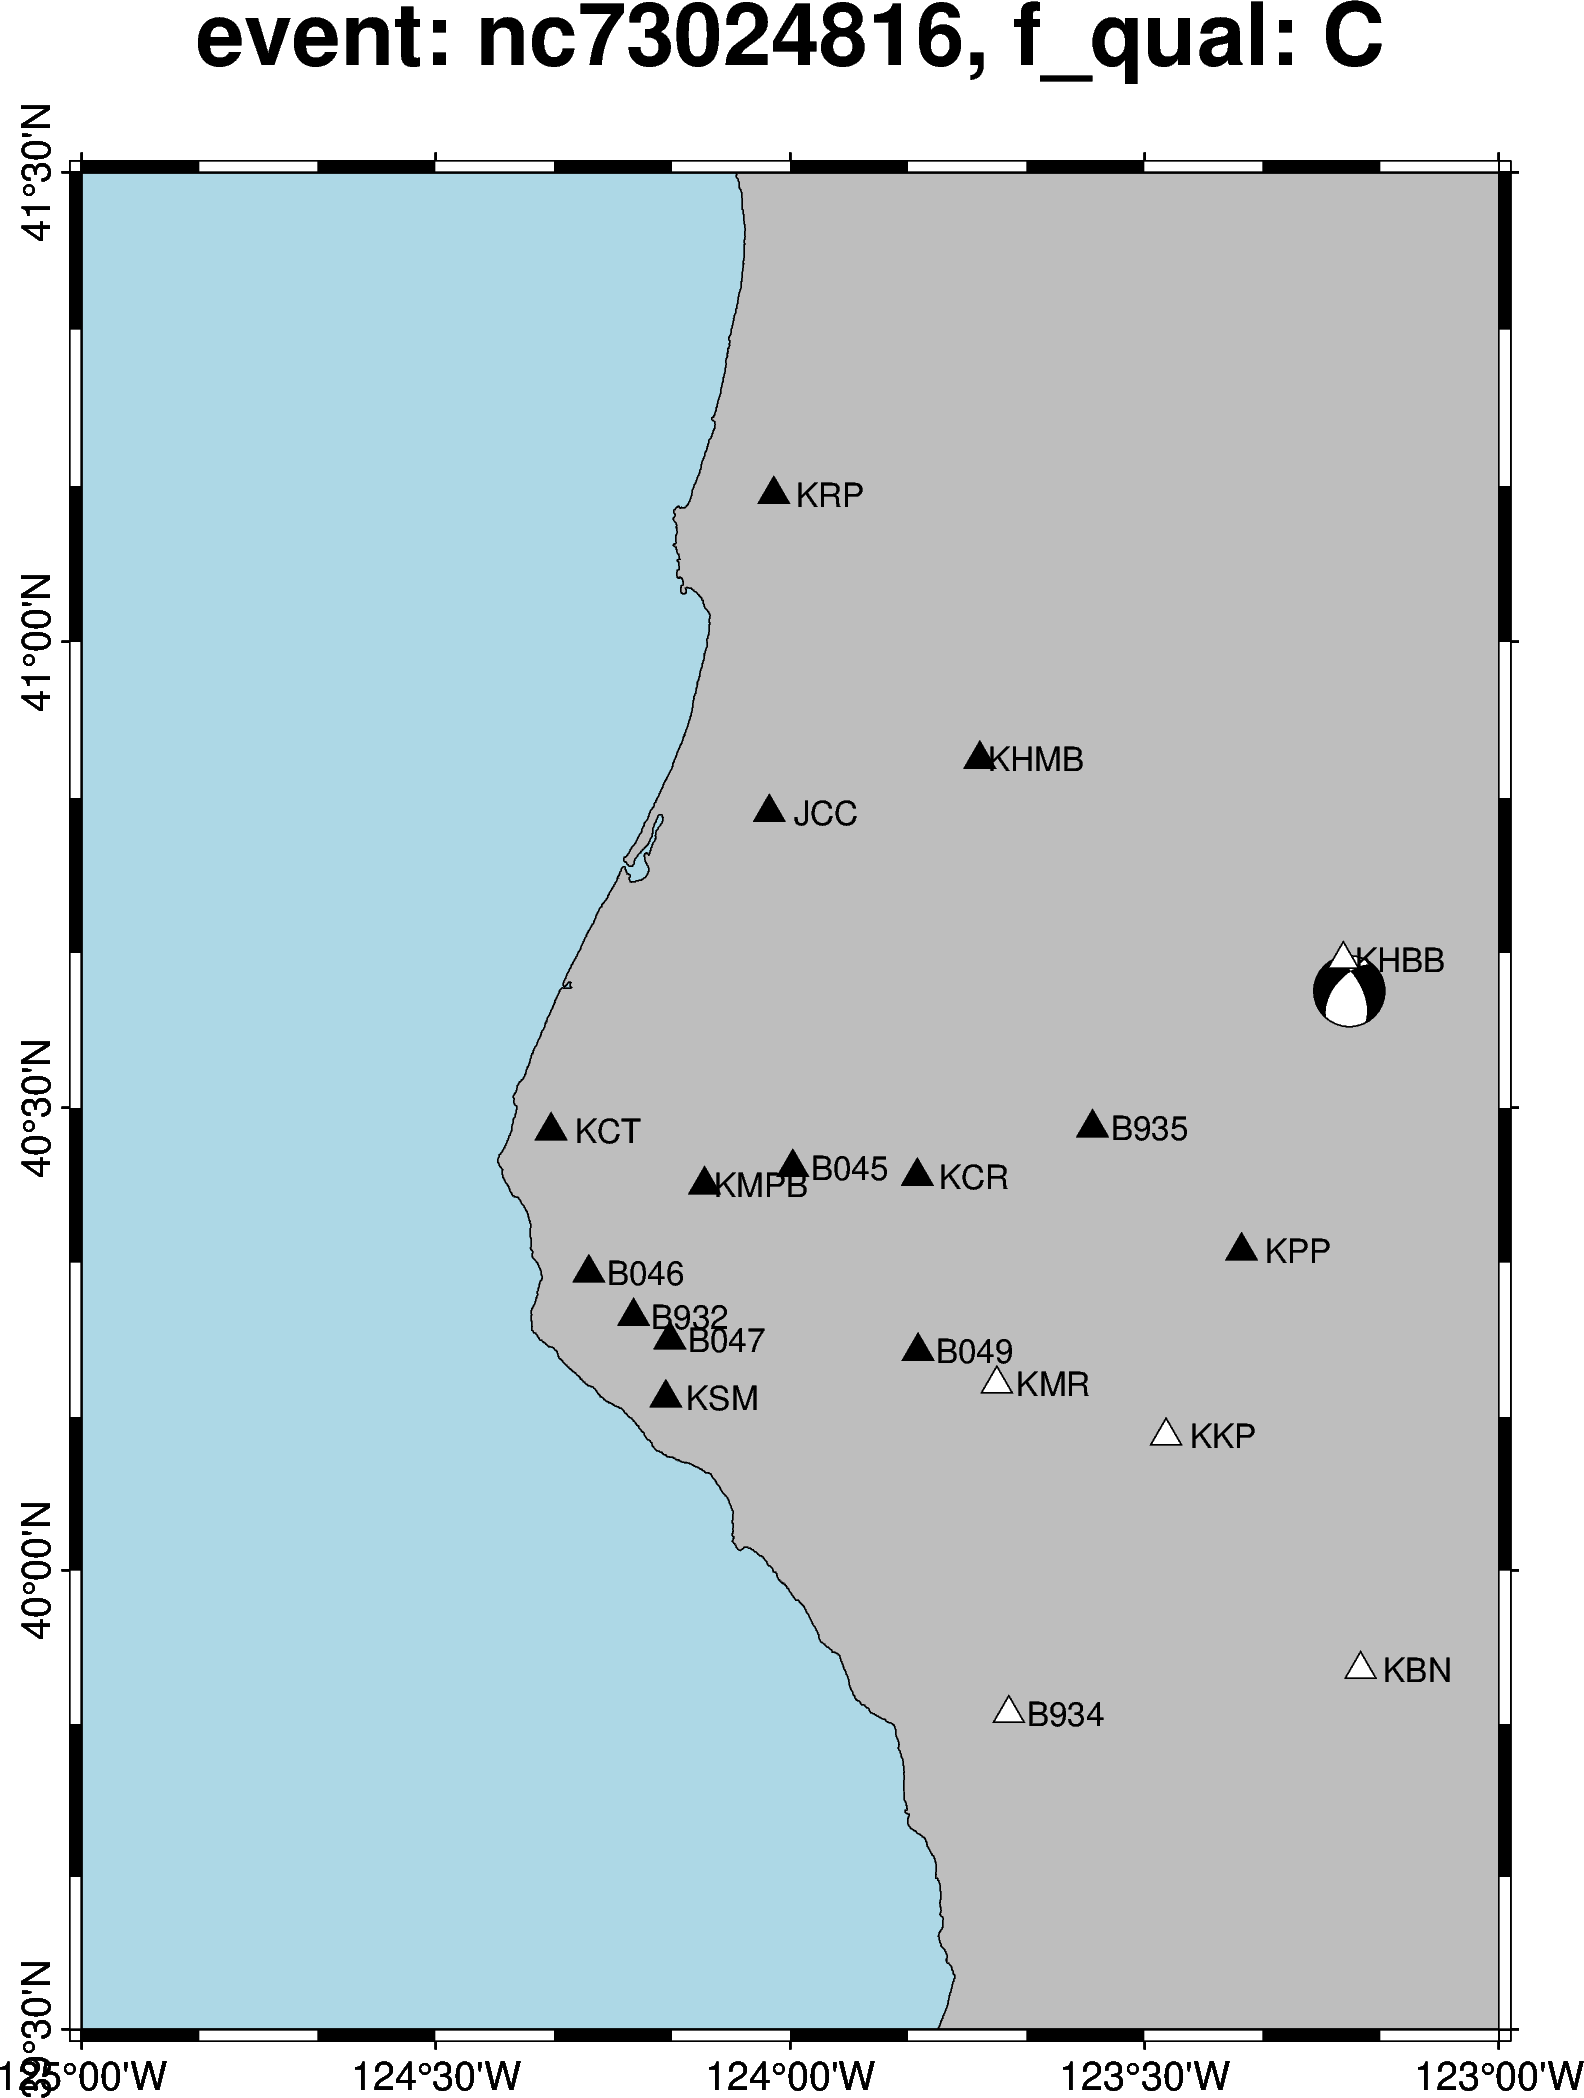

../data/eq_data/nc73201181
(40, 2) (43, 3)


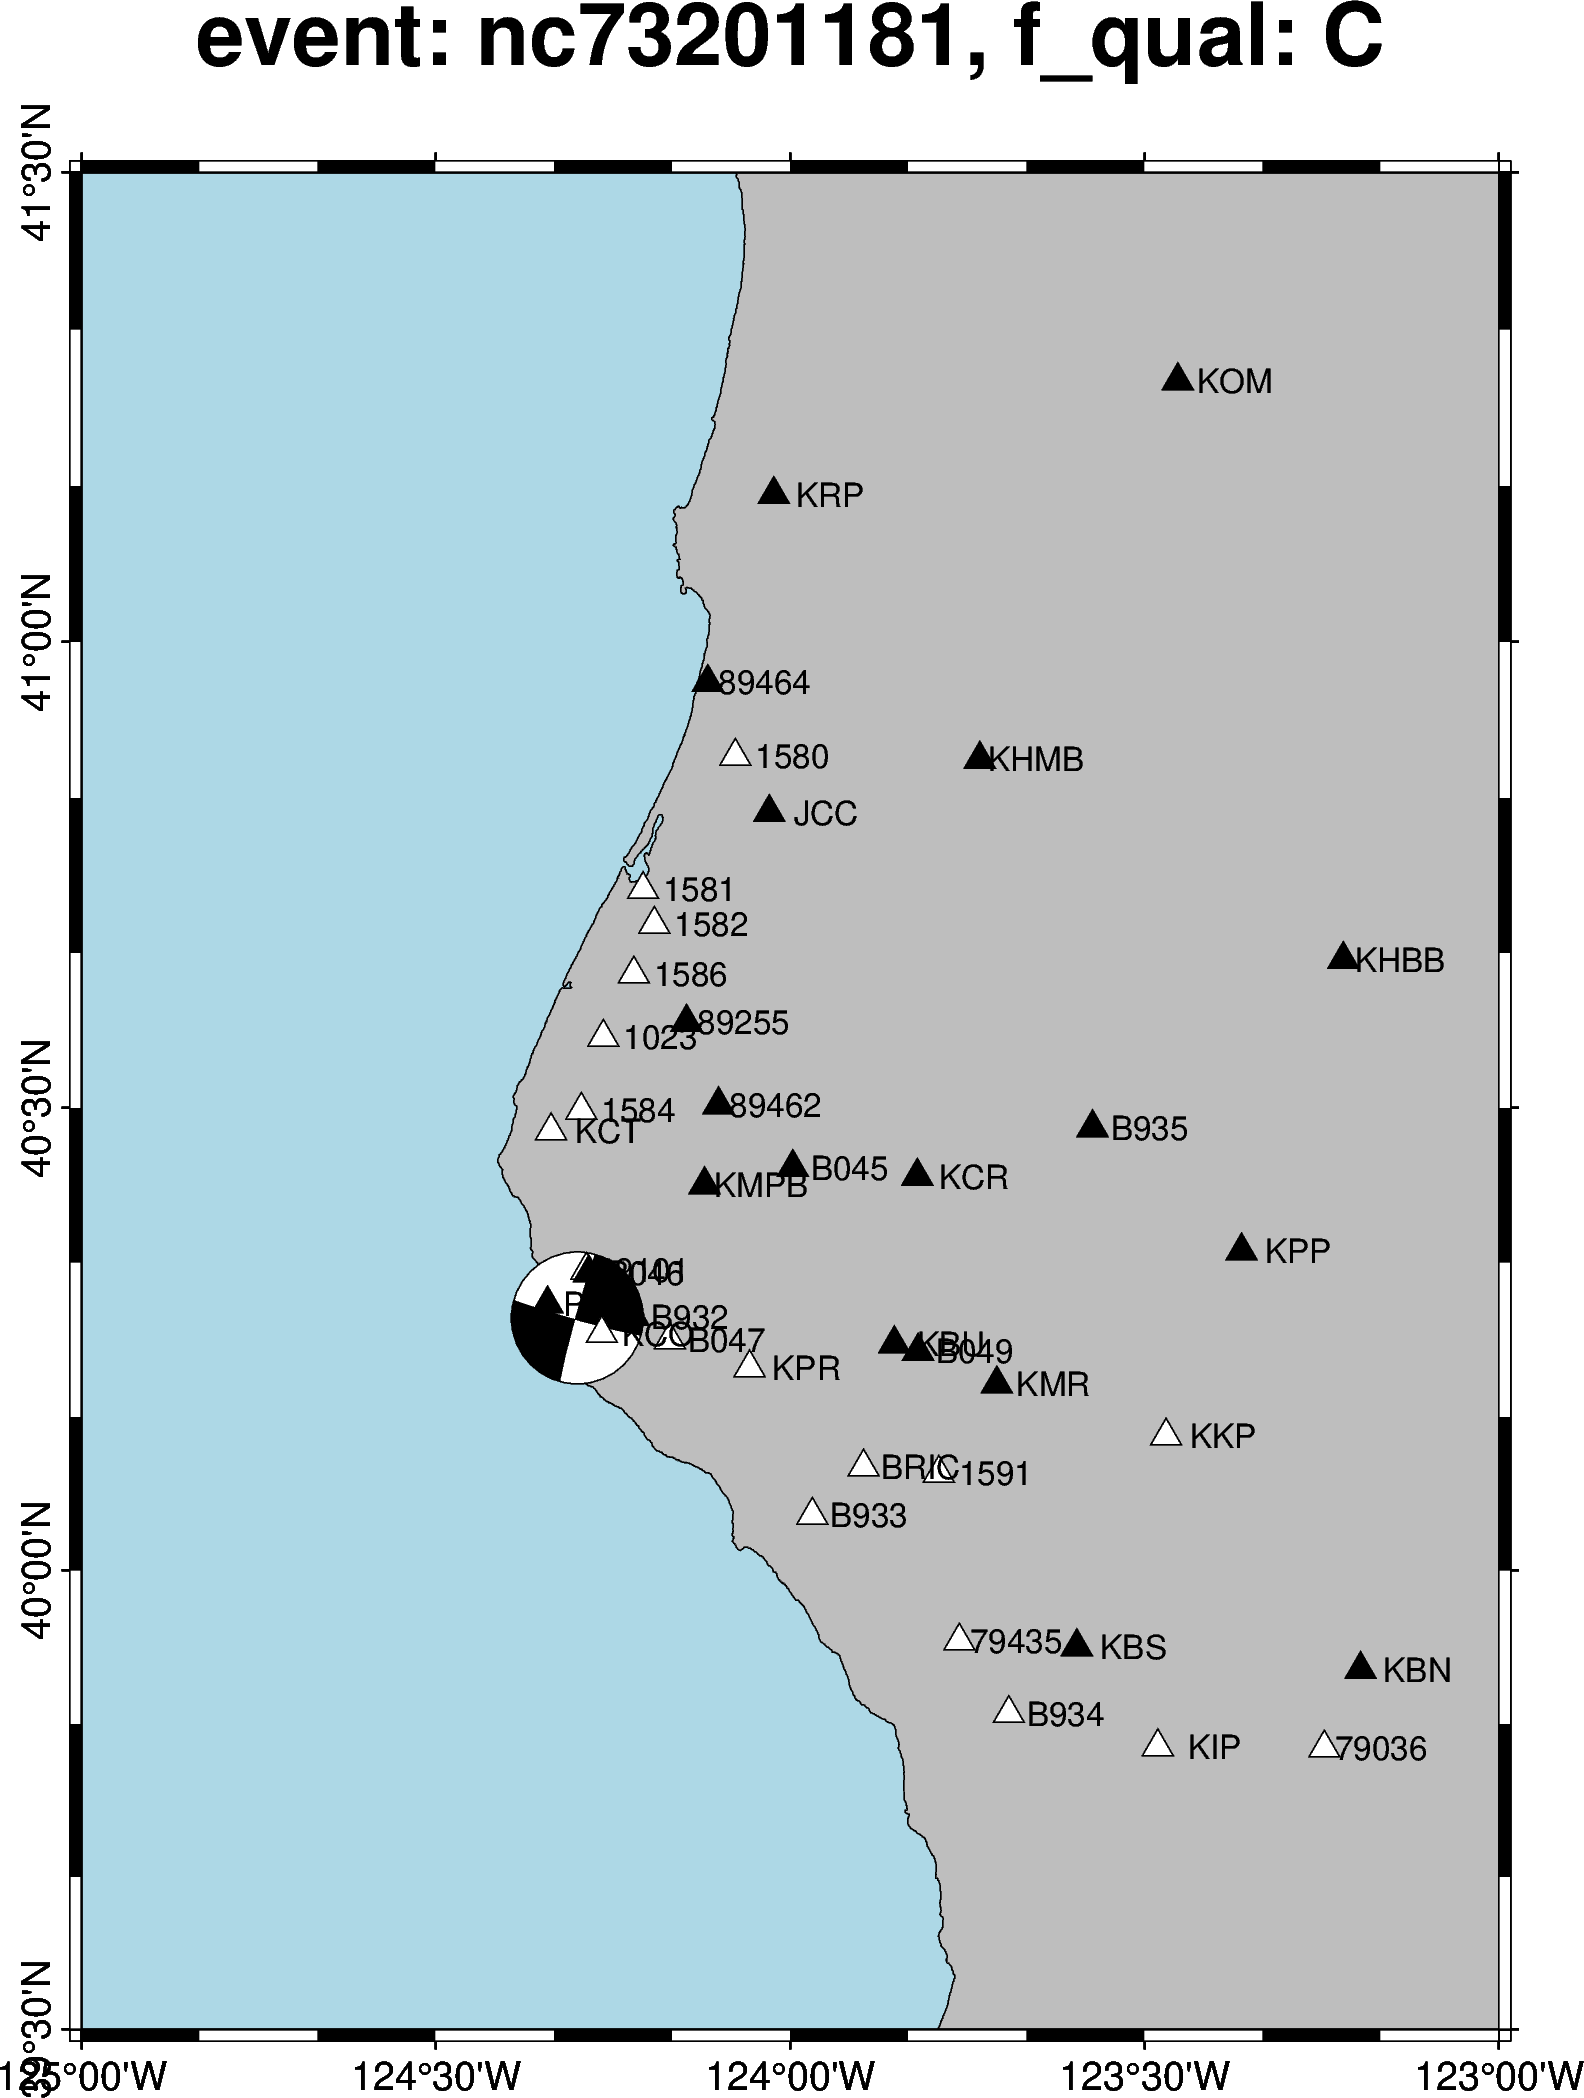

../data/eq_data/nc73311641
(35, 2) (45, 3)


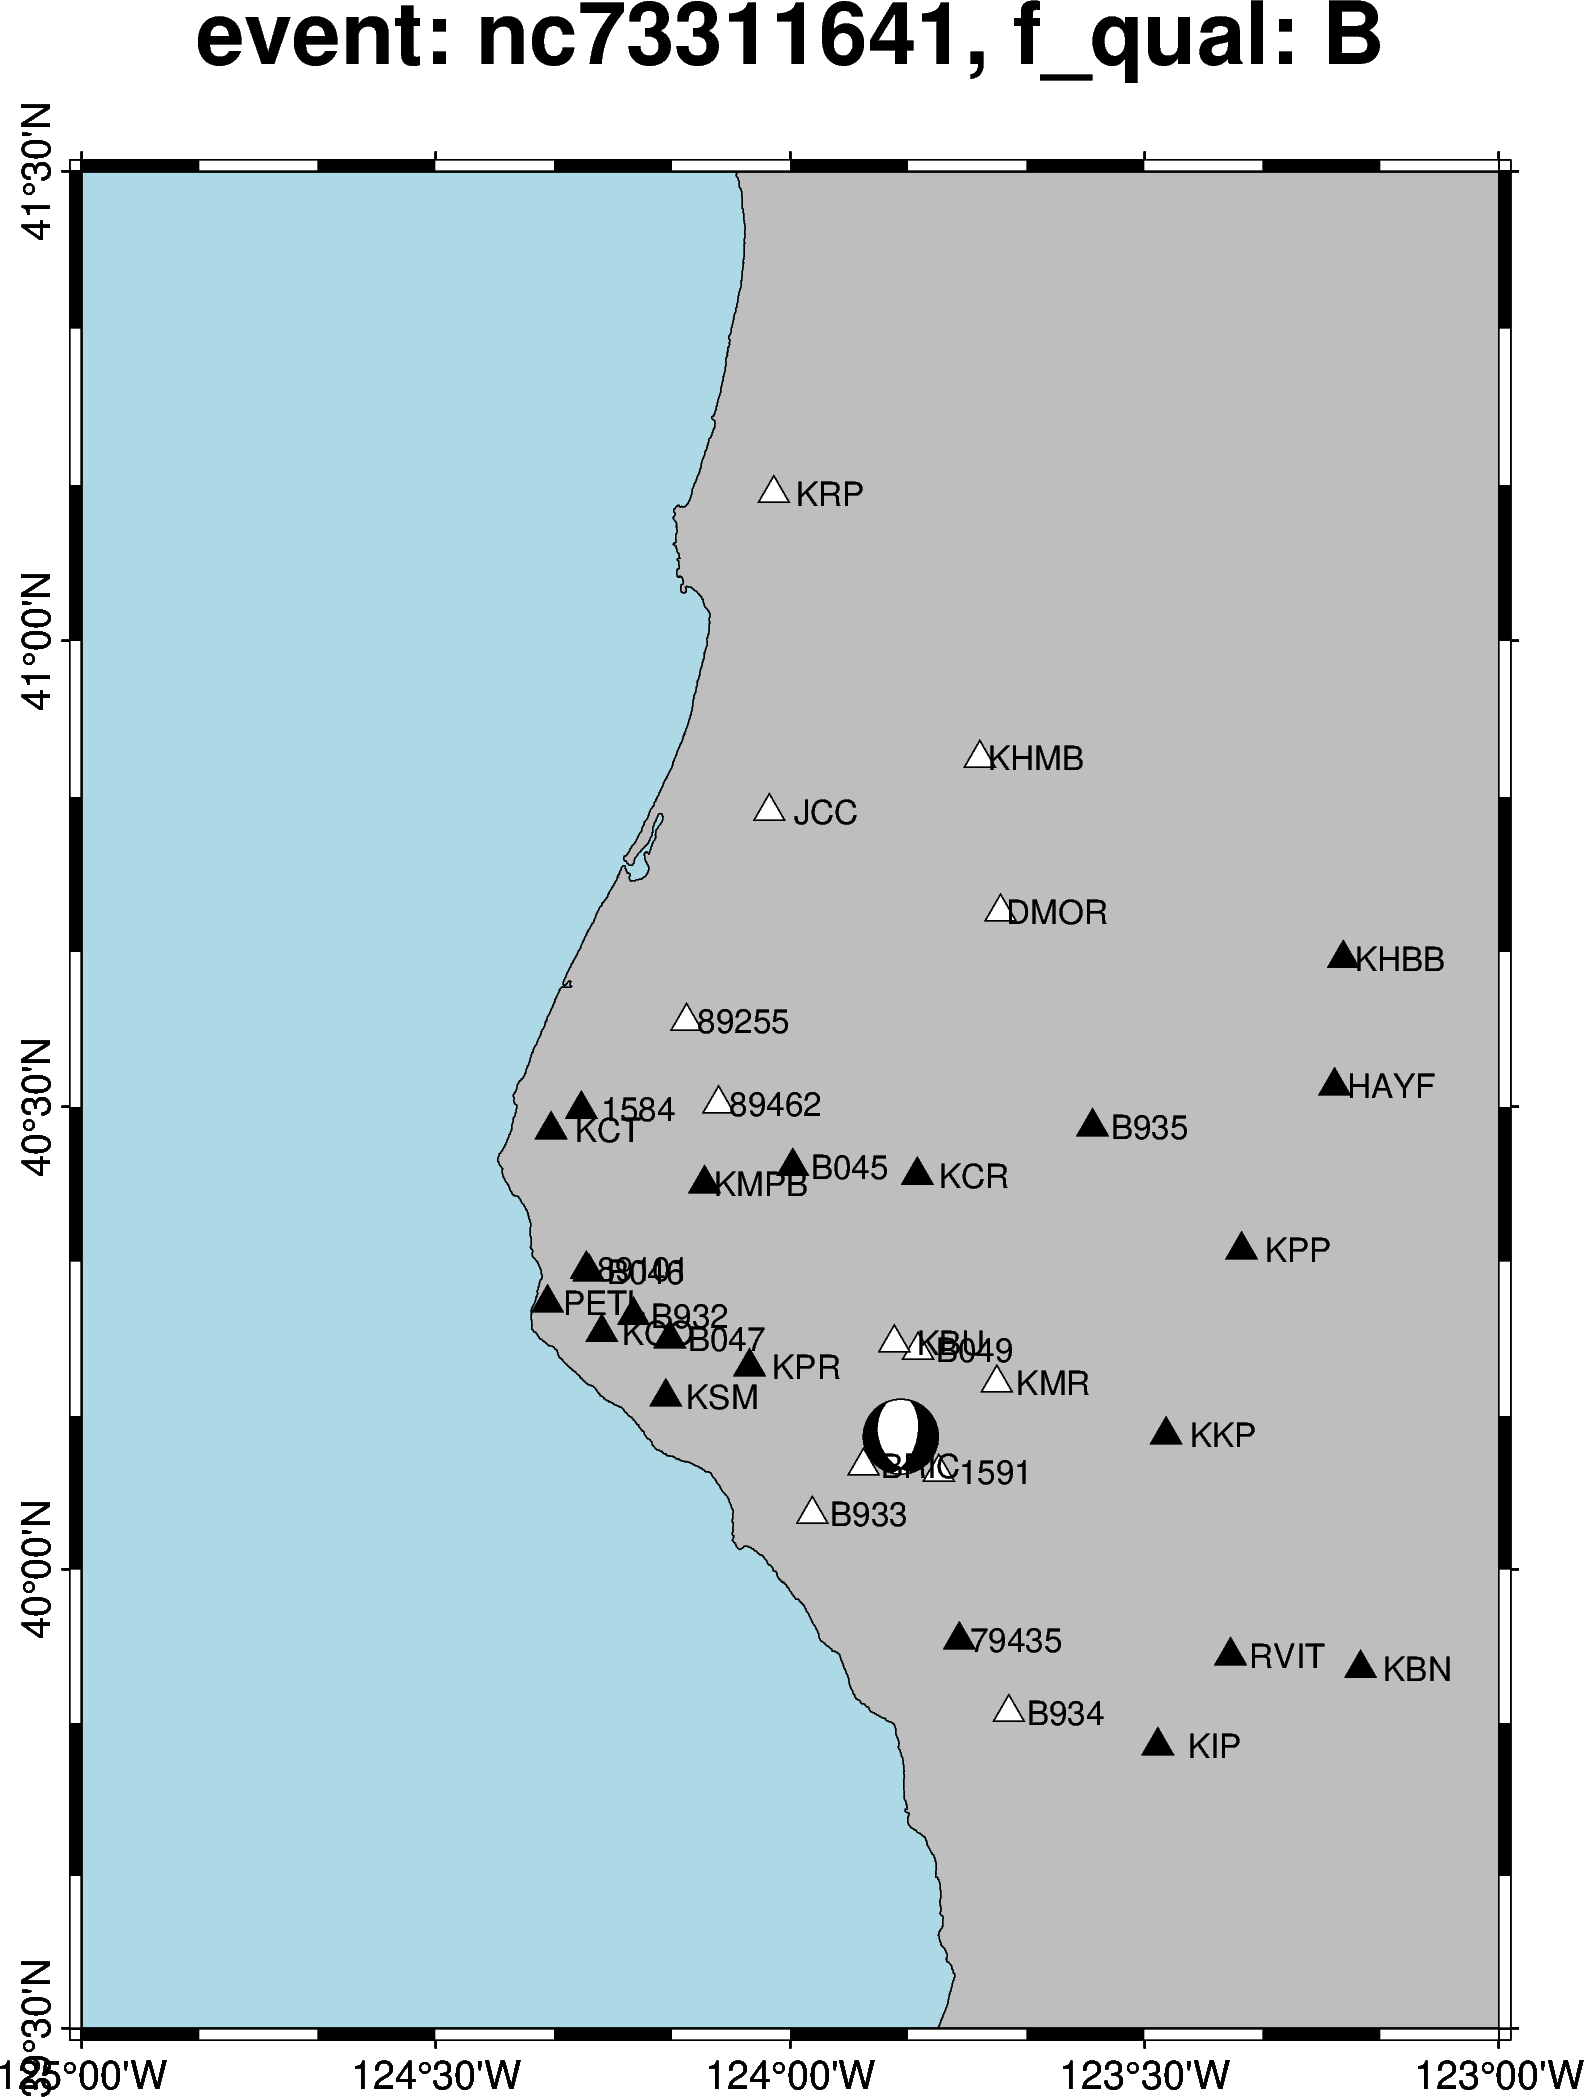

../data/eq_data/nc73629686
(35, 2) (46, 3)


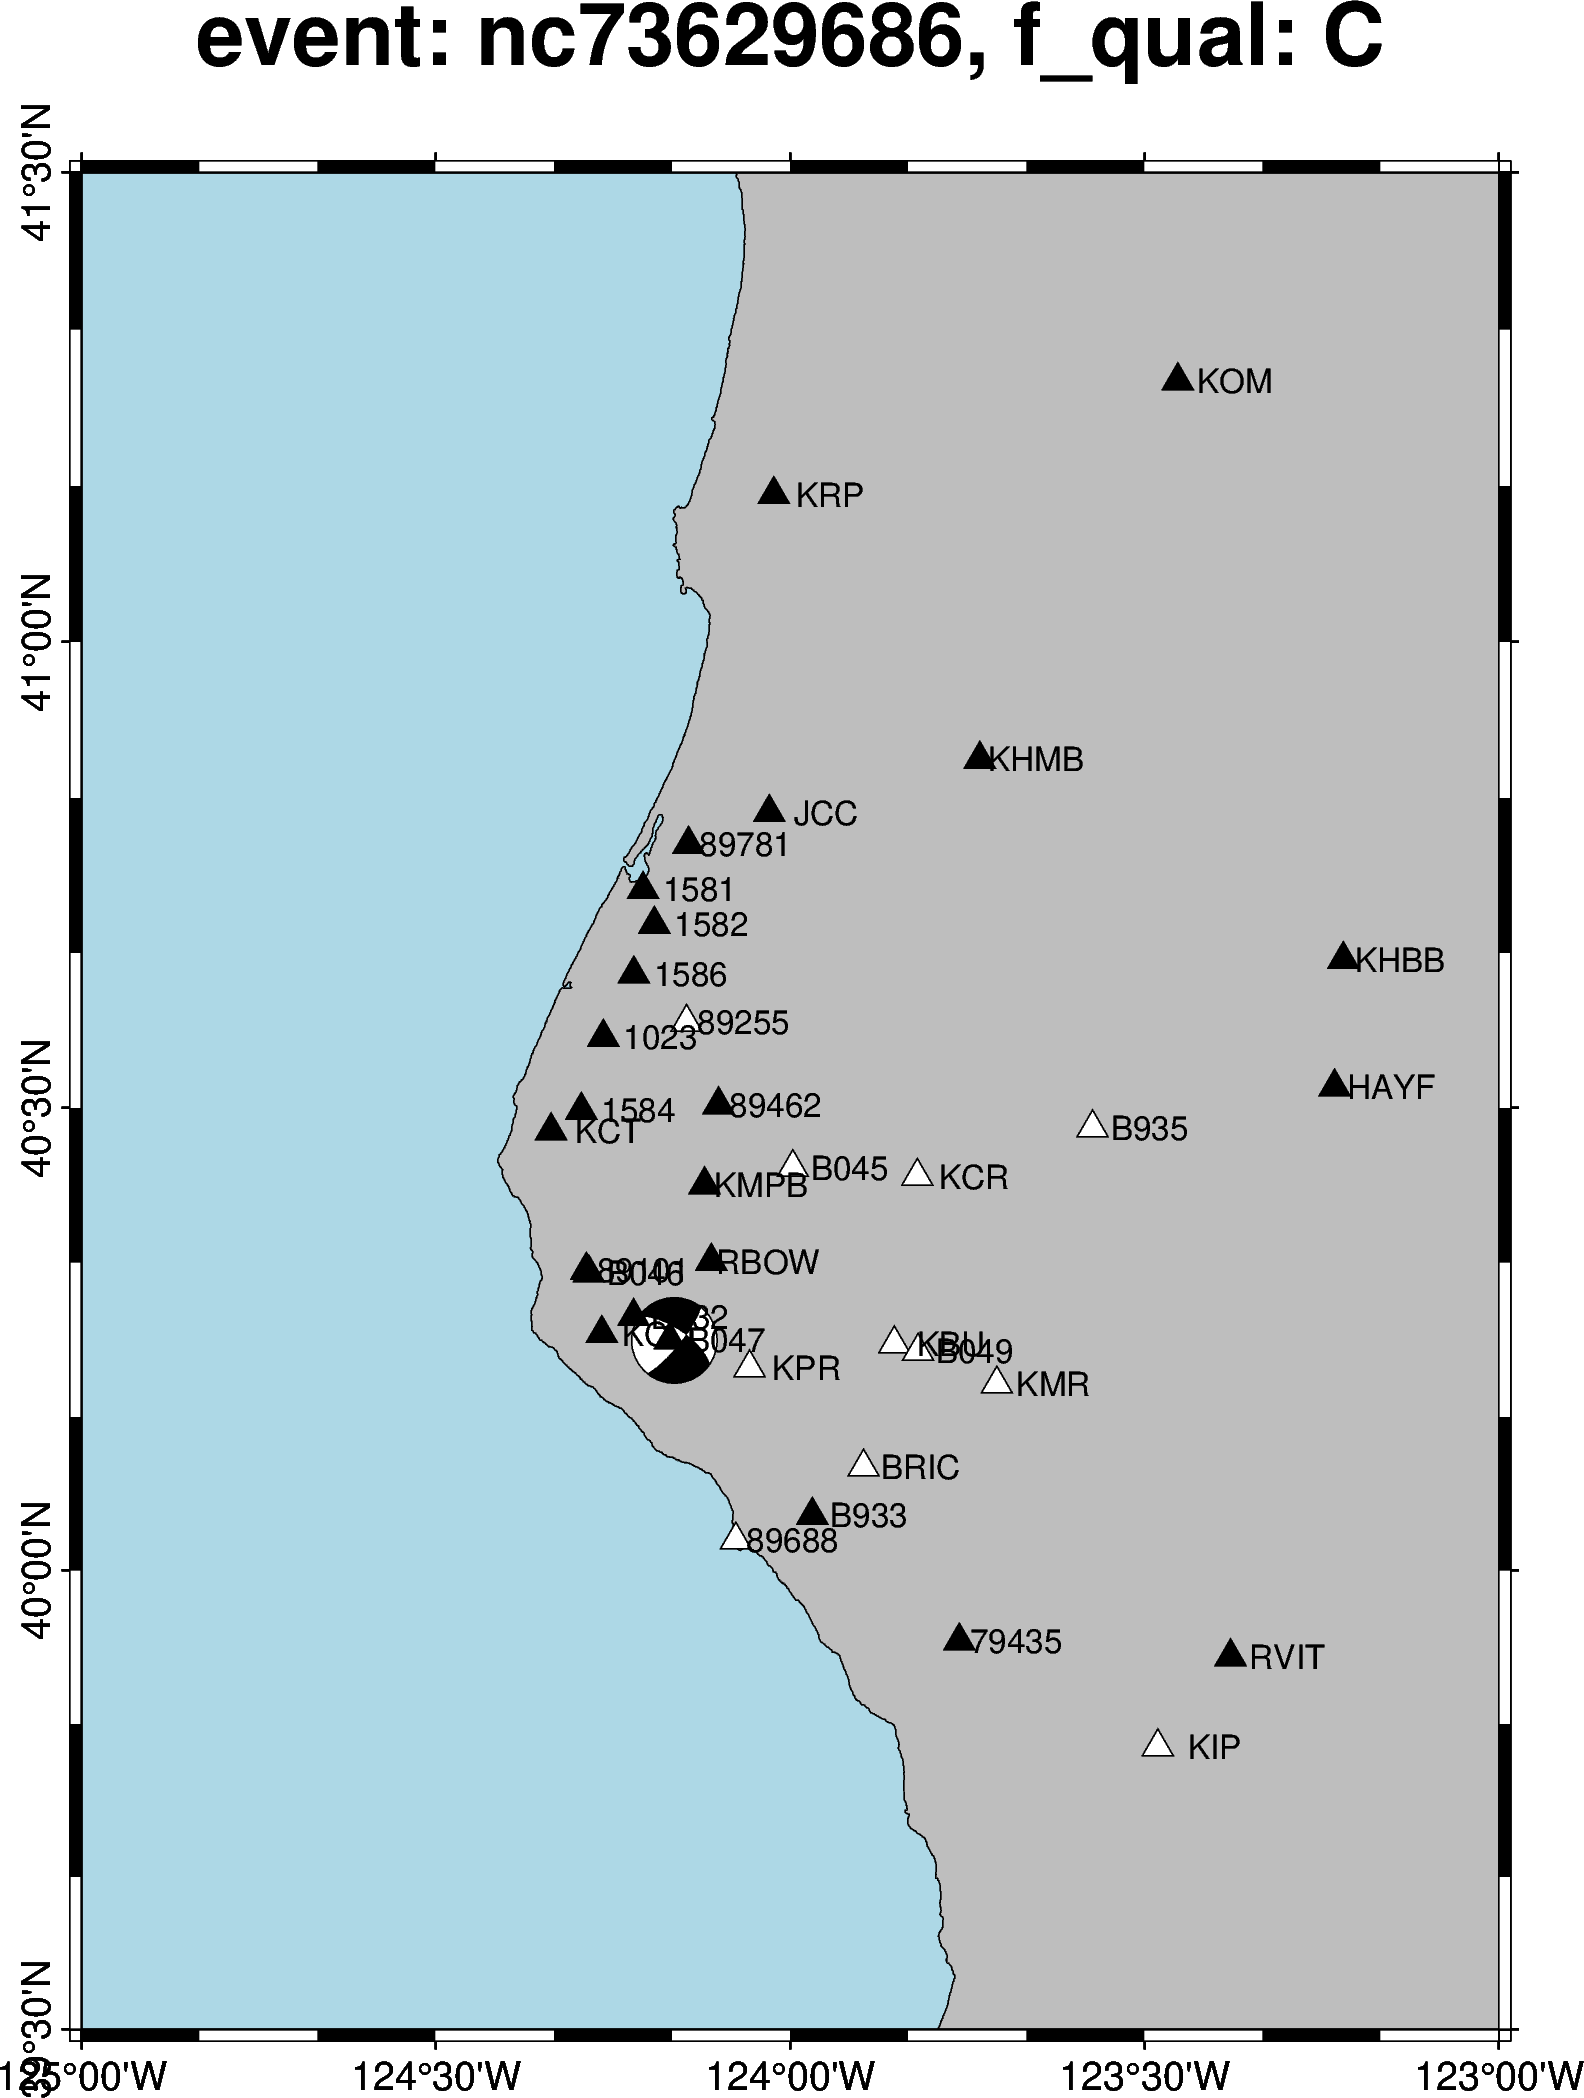

In [53]:
# read the output file
df = pd.read_csv('../data/foc_mech/skhash_out.csv')
df = df.drop_duplicates(subset=['event_id'])
eq_df = pd.read_csv('../data/above_slab_eq_0.2_grid.csv')

region = [-125, -123, 39.5, 41.5]   

for i, row in df.iterrows():
    event_id, strike, dip, rake, f_qual = df['event_id'][i], df['strike'][i], df['dip'][i], df['rake'][i], df['quality'][i]
    eq_row = eq_df[eq_df['id']==event_id]
    elat, elon, edep, emag = eq_row['latitude'], eq_row['longitude'], eq_row['depth'], eq_row['mag']
    
    event_path = f'../data/eq_data/{event_id}'
    print(event_path)

    # get stname, stlat, stlon, polarity (U/D)
    st_pol_loc_df = step4.get_polarity2(event_path, event_id)

    fig = step4.plot_focal(region, strike, dip, rake, elat, elon, edep, magnitude=emag)
    
    # # plot all the stations
    # fig.plot(x=st_pol_loc_df['Longitude'],
    #         y=st_pol_loc_df['Latitude'],
    #         style="t0.3c", 
    #         fill="grey", 
    #         pen="black"
    # )
    
    # plot the polarity based triangles, black for compressional, white for dilatational
    for i, row in st_pol_loc_df.iterrows():
        if row['Polarity'] == 'U': # positive polarity, compressional wave, filled circle
            fig.plot(x=row['Longitude'], y=row['Latitude'], style="t0.3c", fill='black', pen='black')

        elif row['Polarity'] == 'D': # negative polarity, dilatational wave, empty circle
            fig.plot(x=row['Longitude'], y=row['Latitude'], style="t0.3c", fill='white', pen='black')

        else:
            continue
    # plot the station names
    fig.text(x=st_pol_loc_df['Longitude']+0.08, y=st_pol_loc_df['Latitude'],text=st_pol_loc_df['Station'], font='8p')

    # overlay the focal mechanism again to keep it on top
    # pass the focal mechanism data to meca in addition to the scale and event location
    # focal_mechanism = dict(strike=strike, dip=dip, rake=rake, magnitude=3)
    # fig.meca(focal_mechanism, scale="1c", longitude=elon, latitude=elat, depth=edep)

    # title and axis label of the plot
    fig.basemap(frame=[f"+tevent: {event_id}, f_qual: {f_qual}"])

    # fig.savefig(f'png/Focal_mechanism_{event_id}.png')

    fig.show()

    # break

